<a href="https://colab.research.google.com/github/MeshIrina/-1/blob/main/vkr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Подключение диска и импорт библиотек

In [ ]:
# Подключение гугл драйв
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Пути для сохранения и загрузки файлов
path = '/content/drive/MyDrive/ВКР/'
data_path = '/content/drive/MyDrive/ВКР/'
models_path = '/content/drive/MyDrive/ВКР/'

In [ ]:
# Импорт библиотек
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error

from sklearn.neural_network import MLPRegressor
import pickle
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD


#Предобработка

In [ ]:
# определение  версий
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.11.0


In [ ]:
import sys
sys.version

'3.9.16 (main, Dec  7 2022, 01:11:51) \n[GCC 9.4.0]'

In [ ]:
# Сохранение всех рабочих версий библиотек в файле requirements.txt

In [ ]:
pip freeze > data_path + requirements.txt

In [ ]:
#Задаём начальное значение для RANDOM_STATE 
RANDOM_STATE = 19

In [ ]:
# Загрузка исходных данных 
X_bp = pd.read_excel(data_path +'X_bp.xlsx', index_col=0)
X_bp.shape

(1023, 10)

In [ ]:
X_bp.sample(2)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
301                         2.041420       2037.971965             636.829514   
446                         4.770073       1931.131457             516.692589   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
301                   135.866453                        19.714733   
446                   101.364383                        21.538328   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
301                305.537781                     734.734606   
446                301.310480                     168.376964   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
301                             72.990177                    2820.327742   
446                             70.910513                    2357.739620   

     Потребление смолы, г/м2  
301               247.967303  
446               198.668197

In [ ]:
X_nup = pd.read_excel(data_path +'X_nup.xlsx', index_col=0)
X_nup.shape

(1040, 3)

In [ ]:
X_nup.sample(4)

Угол нашивки, град  Шаг нашивки  Плотность нашивки
598                   90     6.755561          42.867512
863                   90    10.545974          52.505197
550                   90     6.432657          55.383654
1021                  90     6.313201          58.261074

In [ ]:
# Объединим датасеты согласно заданию
df = X_bp.join(X_nup, how='inner')
df.shape

(1023, 13)

Проверим на пропуски и дубли

In [ ]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

Посмотрим распределение входных параметров. Проверим на выбросы выбросы

In [ ]:
# Количество уникальных значений в каждом столбце
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

"Угол нашивки, град" принимает 2 значения. Можно превратить в бинарный признак

In [ ]:
df['Угол нашивки, град'] =df['Угол нашивки, град'].map({0: 0,90:1})

In [ ]:
df.sample(6)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
858                         3.133253       1987.311373             749.086041   
971                         2.169074       1889.513179             803.346469   
380                         1.988732       2008.300311             866.596263   
947                         2.978943       2021.145909              79.674564   
336                         3.391009       2023.785804             723.921402   
730                         4.602891       1898.891452             833.367763   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
858                    70.682827                        22.407309   
971                   132.528295                        24.075555   
380                    82.558627                        26.647004   
947                   120.317734                        22.471660   
336                   136.901365                        21.650138   
730                   103.012602                        22.394169   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
858                307.698213                     399.313684   
971                323.153659                     450.429300   
380                274.563206                     342.540268   
947                348.307447                     397.320131   
336                327.402856                     726.627740   
730                296.604337                     535.406493   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
858                             73.909383                    1188.307418   
971                             75.336917                    2147.576085   
380                             78.202731                    2407.873386   
947                             74.693066                    1857.018613   
336                             72.509332                    2305.241225   
730                             77.856284                    2605.463153   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
858               150.144485                   1     4.692441   
971               244.606070                   1     4.911099   
380               235.171423                   0     8.465672   
947               198.635644                   1     8.431718   
336               199.561589                   0    10.187672   
730               305.376981                   1     6.801273   

     Плотность нашивки  
858          50.858542  
971          62.645860  
380          50.636439  
947          52.638796  
336          57.615327  
730          62.269910

In [ ]:
df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1023.000000              1023.000000   
mean                     2466.922843               218.423144   
std                       485.628006                59.735931   
min                      1036.856605                33.803026   
25%                      2135.850448               179.627520   
50%                      2459.524526               219.198882   
75%                      2767.193119               257.481724   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean             0.491691     6.899222          57.153929  
std              0.500175     2.563467          12.350969  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.080033          49.799212  
50%              0.000000     6.916144          57.341920  
75%              1.000000     8.586293          64.944961  
max              1.000000    14.440522         103.988901

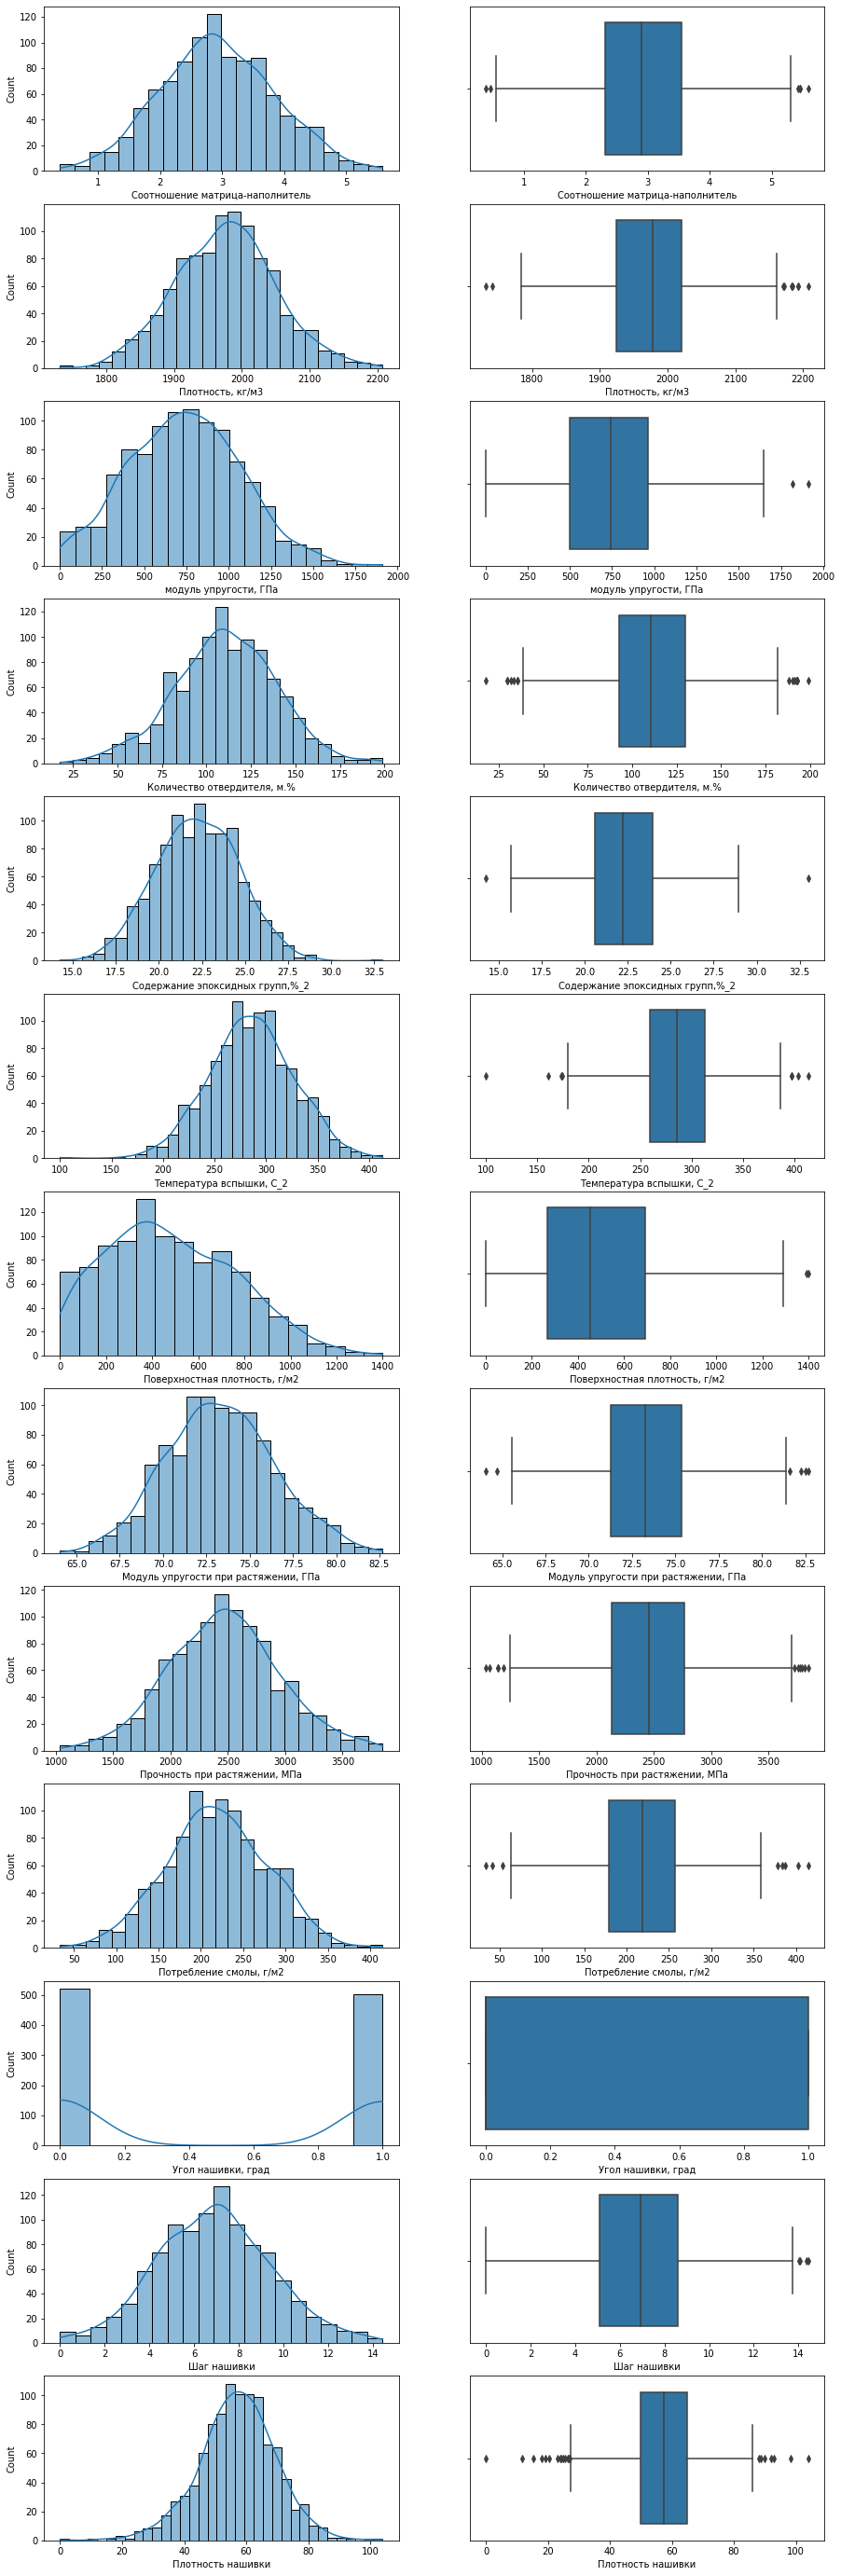

In [ ]:
# Строим графики распределения переменных и "ящики с усами"
fig, axes = plt.subplots(13, 2, figsize=(15, 50))
for col, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[col, 0])
    sns.boxplot(data=df, x=column,ax=axes[col, 1])
    c+=1  
plt.show()

Проверим гипотезу о том, что распределения можно считать нормальными.   Соотношение между количеством измерений по разным углам нашивки практически совпадают.

In [ ]:

yes_list = []
no_list = []

for col in df.columns:
    alpha = 0.05
    stat, p = scipy.stats.normaltest(df[col]) # Критерий согласия Пирсона
    if p > alpha:
        yes_list.append(col)
    else:
        no_list.append(col)
print(f'Наименование колонок с данными для которых принимаем гипотезу о нормальном распределении: {yes_list}')
print(f'Наименование колонок с данными для которых принимаем гипотезу о нормальном распределении : {no_list}')

Наименование колонок с данными для которых принимаем гипотезу о нормальном распределении: ['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2', 'Шаг нашивки']
Наименование колонок с данными для которых принимаем гипотезу о нормальном распределении : ['Поверхностная плотность, г/м2', 'Угол нашивки, град', 'Плотность нашивки']


Так как выбросов по данным, в которых не была принята гипотеза о нормальном распределении немного, проведём для всех данных очистку по методу 3G, который применяется при нормальном распределении.

In [ ]:
clear = df.copy()
for column in df:
 zscore = (df[column] - df[column].mean()) / df[column].std()
 clear[column] = (zscore.abs() > 3)
clear = df[clear.sum(axis=1)==0]
clear.shape

(1000, 13)

сохраним неочищенные и очищенные данные на диск

In [ ]:
df.to_excel(data_path + 'df.xlsx')
clear.to_excel(data_path + 'clear.xlsx')

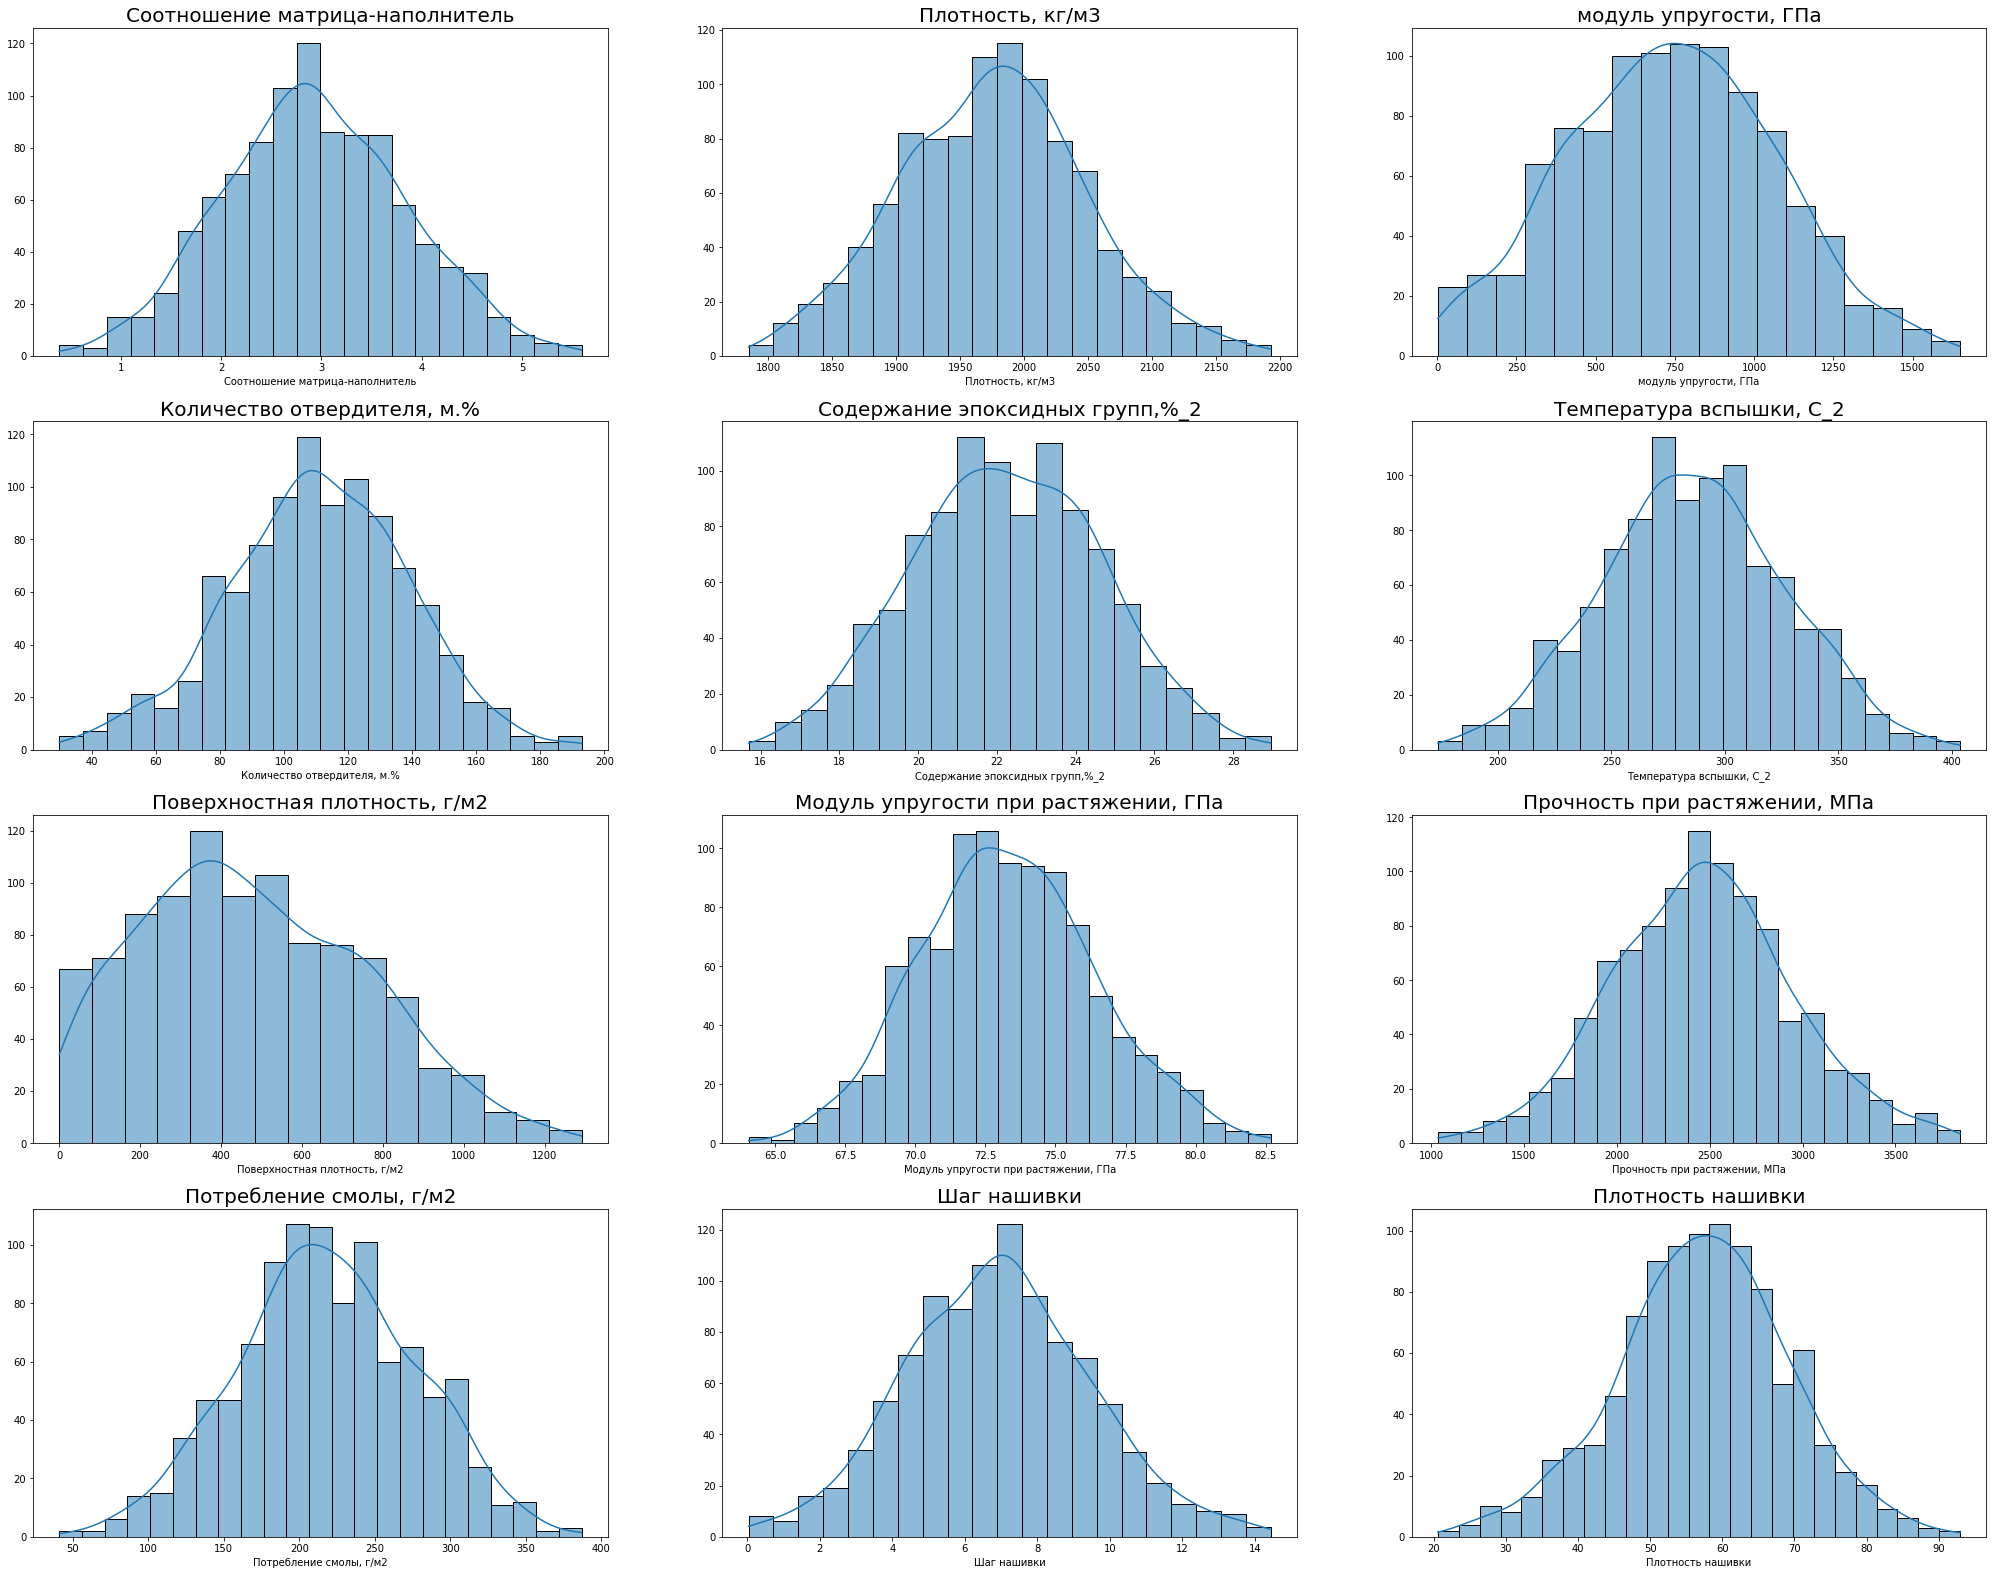

In [ ]:
# Посмотрим  графики распределения переменных на очищенных данных
a = 5
b = 3
c = 1

plt.figure(figsize=(35,35))

for col in clear.columns:
  if col!='Угол нашивки, град':
    plt.subplot(a, b, c)
    sns.histplot(data = clear[col], kde=True)
    plt.ylabel(None)
    plt.title(col, size = 20)
    c+=1

Построим корреляционную матрицу

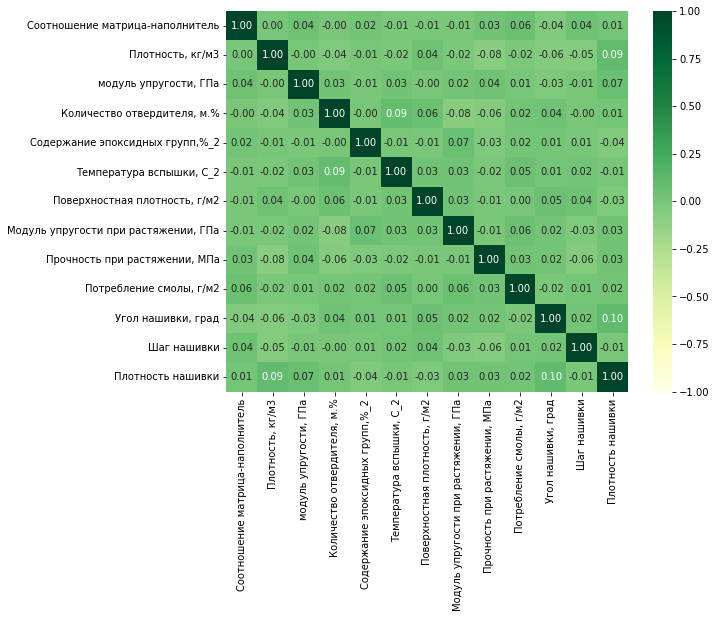

In [ ]:
corr = clear.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='YlGn', ax=ax)
plt.show()

Параметры друг с другом линейно не скоррелированы. Попробуем посмотреть корреляцию на попарных графиках рассеяния в зависимости от угла нашивки

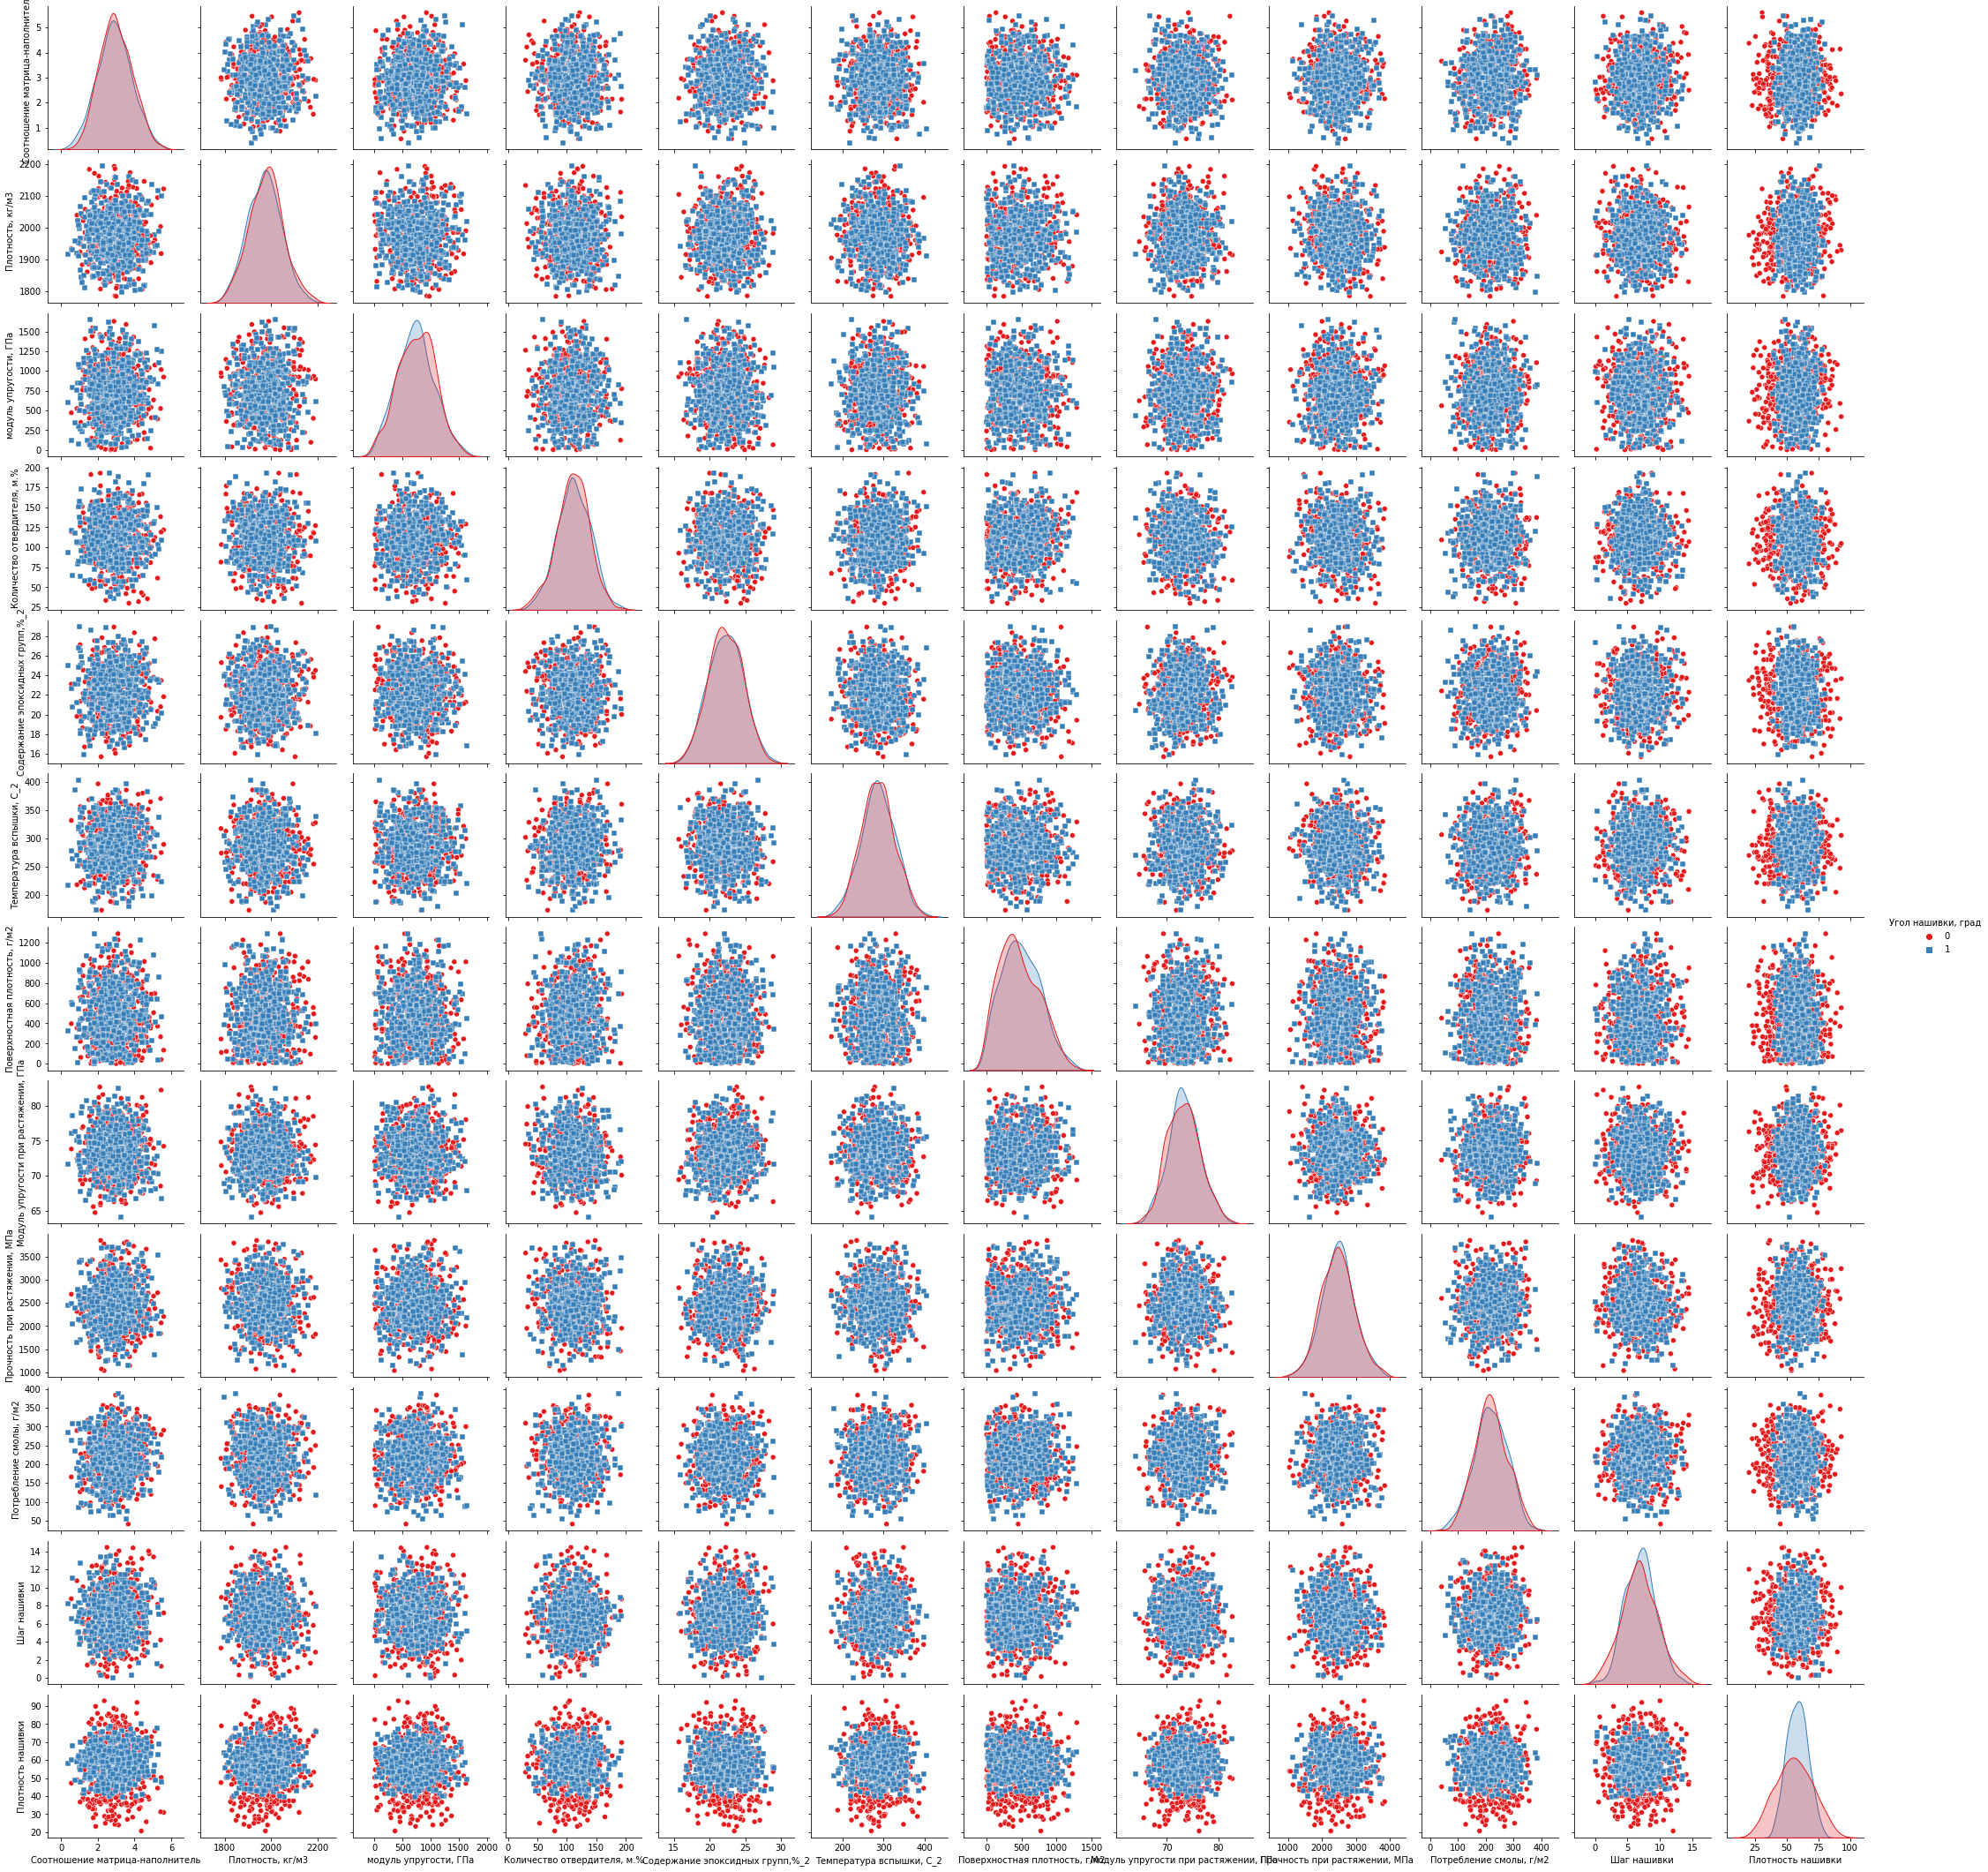

In [ ]:
sns.pairplot(clear, hue = 'Угол нашивки, град', markers=["o", "s"],  palette='Set1')

Зависимости не прослеживаются

# Обучение и сравнение моделей

##Основные метрики

Наиболее типичными мерами качества в задачах регрессии являются

Средняя квадратичная ошибка (англ. Mean Squared Error, MSE)
MSE применяется в ситуациях, когда нам надо подчеркнуть большие ошибки и выбрать модель, которая дает меньше больших ошибок прогноза. Грубые ошибки становятся заметнее за счет того, что ошибку прогноза мы возводим в квадрат. И модель, которая дает нам меньшее значение среднеквадратической ошибки, можно сказать, что что у этой модели меньше грубых ошибок.

Cредняя абсолютная ошибка (англ. Mean Absolute Error, MAE)

Среднеквадратичный функционал сильнее штрафует за большие отклонения по сравнению со среднеабсолютным, и поэтому более чувствителен к выбросам. При использовании любого из этих двух функционалов может быть полезно проанализировать, какие объекты вносят наибольший вклад в общую ошибку — не исключено, что на этих объектах была допущена ошибка при вычислении признаков или целевой величины.

Среднеквадратичная ошибка подходит для сравнения двух моделей или для контроля качества во время обучения, но не позволяет сделать выводов о том, на сколько хорошо данная модель решает задачу. Например, MSE = 10 является очень плохим показателем, если целевая переменная принимает значения от 0 до 1, и очень хорошим, если целевая переменная лежит в интервале (10000, 100000). В таких ситуациях вместо среднеквадратичной ошибки полезно использовать коэффициент детерминации — R2

Коэффициент детерминации R2

Коэффициент детерминации измеряет долю дисперсии, объясненную моделью, в общей дисперсии целевой переменной. Фактически, данная мера качества — это нормированная среднеквадратичная ошибка. Если она близка к единице, то модель хорошо объясняет данные, если же она близка к нулю, то прогнозы сопоставимы по качеству с константным предсказанием.

Средняя абсолютная процентная ошибка (англ. Mean Absolute Percentage Error, MAPE)
Это коэффициент, не имеющий размерности, с очень простой интерпретацией. Его можно измерять в долях или процентах. Если у вас получилось, например, что MAPE=11.4%, то это говорит о том, что ошибка составила 11,4% от фактических значений. Основная проблема данной ошибки — нестабильность.

Корень из средней квадратичной ошибки (англ. Root Mean Squared Error, RMSE)

Примерно такая же проблема, как и в MAPE: так как каждое отклонение возводится в квадрат, любое небольшое отклонение может значительно повлиять на показатель ошибки. Стоит отметить, что существует также ошибка MSE, из которой RMSE как раз и получается путем извлечения корня.



In [ ]:

clear = pd.read_excel(data_path + 'clear.xlsx', index_col=0)
clear

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
5                            2.767918       2000.000000   
6                            2.569620       1910.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                738.736842                    50.000000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.000000                   111.860000   
6                807.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                           23.750000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
5                           22.267857                284.615385   
6                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
5                        210.000000                             70.000000   
6                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
5                       3000.000000               220.000000   
6                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

Чтобы было удобнее писать код переименуем столбцы датафрейма

In [ ]:
clear. rename(columns = {'Соотношение матрица-наполнитель':'mn', 'Плотность, кг/м3':'x2','модуль упругости, ГПа':'x3','Количество отвердителя, м.%':'x4','Содержание эпоксидных групп,%_2':'x5','Температура вспышки, С_2':'x6','Поверхностная плотность, г/м2':'x7','Модуль упругости при растяжении, ГПа':'y_my','Прочность при растяжении, МПа':'y_pr','Потребление смолы, г/м2':'x8','Угол нашивки, град':'x9','Шаг нашивки':'x10','Плотность нашивки':'x11'}, inplace = True )

In [ ]:
clear.sample(2)

mn           x2           x3          x4         x5          x6  \
5    2.767918  2000.000000   748.000000  111.860000  22.267857  284.615385   
170  3.618498  2037.623968  1109.157647  133.499649  21.573073  346.824340   

             x7       y_my         y_pr          x8  x9      x10        x11  
5    210.000000  70.000000  3000.000000  220.000000   0  5.00000  60.000000  
170  560.432685  77.508045  2607.259311  230.788905   0  4.40974  75.627836

In [ ]:
clear.describe()

mn           x2           x3           x4           x5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.936299  1975.402478   738.675486   110.821904    22.235549   
std       0.908779    72.953703   327.545245    27.869622     2.384246   
min       0.389403  1784.482245     2.436909    29.956150    15.695894   
25%       2.319283  1923.628661   500.772963    92.523816    20.583191   
50%       2.908811  1977.321002   741.148111   110.652620    22.221462   
75%       3.553931  2021.159498   961.650808   129.853101    23.974880   
max       5.591742  2192.738783  1649.415706   192.851702    28.955094   

                x6           x7         y_my         y_pr           x8  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    285.957299   479.855825    73.318178  2464.864198   218.254011   
std      40.231508   277.708571     3.113817   485.015353    58.944958   
min     173.484920     0.603740    64.054061  1036.856605    41.048278   
25%     259.103839   266.978731    71.248823  2134.535871   179.812213   
50%     285.853960   450.869535    73.230375  2456.394188   218.697660   
75%     313.029126   691.528426    75.326573  2760.163022   257.474775   
max     403.652861  1291.340115    82.682051  3848.436732   386.903431   

                x9          x10          x11  
count  1000.000000  1000.000000  1000.000000  
mean      0.496000     6.910600    57.276293  
std       0.500234     2.557748    11.845791  
min       0.000000     0.037639    20.571633  
25%       0.000000     5.105814    49.892983  
50%       0.000000     6.922196    57.471971  
75%       1.000000     8.588839    64.930896  
max       1.000000    14.440522    92.963492

##Разделение исходных данных на входные и выходные параметры. Нормализация.

In [ ]:
#Некоторые модели потребуют нормализацию данных
min_max_scaler = MinMaxScaler()
df_min_max = pd.DataFrame(min_max_scaler.fit_transform(clear), columns = clear.columns, index=clear.index)
df_min_max.describe()

mn           x2           x3           x4           x5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.489568     0.467648     0.447024     0.496427     0.493216   
std       0.174687     0.178696     0.198876     0.171089     0.179818   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.370964     0.340831     0.302576     0.384097     0.368597   
50%       0.484284     0.472347     0.448525     0.495388     0.492154   
75%       0.608289     0.579727     0.582408     0.613258     0.624396   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                x6           x7         y_my         y_pr           x8  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.488654     0.371301     0.497322     0.507902     0.512370   
std       0.174792     0.215155     0.167158     0.172506     0.170432   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.371985     0.206374     0.386234     0.390414     0.401220   
50%       0.488205     0.348844     0.492609     0.504890     0.513653   
75%       0.606271     0.535295     0.605138     0.612932     0.625772   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                x9          x10          x11  
count  1000.000000  1000.000000  1000.000000  
mean      0.496000     0.477193     0.507027  
std       0.500234     0.177586     0.163634  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.351886     0.405037  
50%       0.000000     0.477999     0.509730  
75%       1.000000     0.593714     0.612766  
max       1.000000     1.000000     1.000000

In [ ]:
st_scaler = StandardScaler()
df_st = pd.DataFrame(st_scaler.fit_transform(clear), columns = clear.columns, index=clear.index)
df_st.describe()

mn            x2            x3            x4            x5  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   1.314504e-16 -7.105427e-17  1.527667e-16 -2.877698e-16 -2.655653e-16   
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min   -2.803951e+00 -2.618315e+00 -2.248871e+00 -2.903025e+00 -2.744234e+00   
25%   -6.792907e-01 -7.100356e-01 -7.266830e-01 -6.568888e-01 -6.933787e-01   
50%   -3.026265e-02  2.631099e-02  7.552734e-03 -6.077177e-03 -5.911242e-03   
75%    6.799682e-01  6.275201e-01  6.810873e-01  6.832070e-01  7.298752e-01   
max    2.923452e+00  2.980590e+00  2.781893e+00  2.944814e+00  2.819721e+00   

                 x6            x7          y_my          y_pr            x8  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   1.078249e-15  3.907985e-17  1.564082e-15 -6.785683e-16 -1.563194e-16   
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min   -2.797028e+00 -1.726601e+00 -2.976653e+00 -2.945726e+00 -3.007796e+00   
25%   -6.678074e-01 -7.669321e-01 -6.649040e-01 -6.814086e-01 -6.524906e-01   
50%   -2.569892e-03 -1.044289e-01 -2.821187e-02 -1.747212e-02  7.530255e-03   
75%    6.732378e-01  7.625927e-01  6.453174e-01  6.091489e-01  6.657124e-01   
max    2.926921e+00  2.923534e+00  3.008705e+00  2.854064e+00  2.862566e+00   

                x9           x10           x11  
count  1000.000000  1.000000e+03  1.000000e+03  
mean      0.000000  9.059420e-17  3.836931e-16  
std       1.000500  1.000500e+00  1.000500e+00  
min      -0.992032 -2.688459e+00 -3.100091e+00  
25%      -0.992032 -7.059685e-01 -6.235973e-01  
50%      -0.992032  4.535865e-03  1.652712e-02  
75%       1.008032  6.564680e-01  6.465110e-01  
max       1.008032  2.945439e+00  3.014156e+00

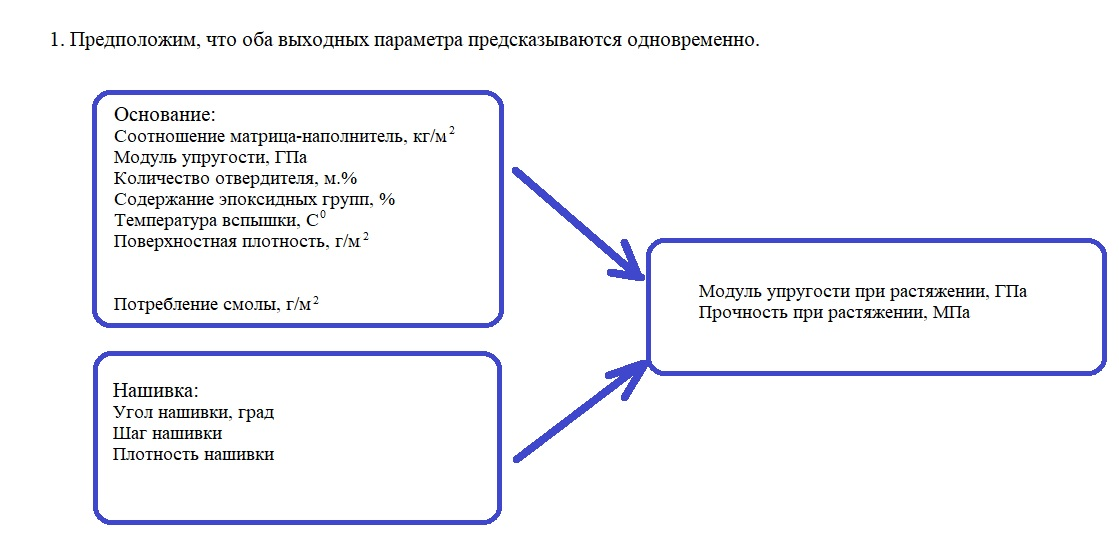

In [ ]:
from IPython.display import Image
Image(filename=data_path + 'separation1.jpg')

In [ ]:
#Разбиваем данные на обучающую и тестовую выборки (1 вариант)
X_2par = clear.drop(['y_my','y_pr'], axis=1)
y_2par_my = clear['y_my']
y_2par_pr = clear['y_pr']

X_train_2par, X_test_2par, y_train_2par_my, y_test_2par_my = train_test_split(X_2par, y_2par_my, test_size=0.3, random_state=19)
X_train_2par, X_test_2par, y_train_2par_pr, y_test_2par_pr = train_test_split(X_2par, y_2par_pr, test_size=0.3, random_state=19)

In [ ]:
#Разбиваем данные на обучающую и тестовую выборки (2 вариант)
X_2par_min_max = df_min_max.drop(['y_my','y_pr'], axis=1)
y_2par_my_min_max = df_min_max['y_my']
y_2par_pr_min_max = df_min_max['y_pr']

X_train_2par_min_max, X_test_2par_min_max, y_train_2par_my_min_max, y_test_2par_my_min_max = train_test_split(X_2par_min_max, y_2par_my_min_max, test_size=0.3, random_state=19)
X_train_2par_min_max, X_test_2par_min_max, y_train_2par_pr_min_max, y_test_2par_pr_min_max = train_test_split(X_2par_min_max, y_2par_pr_min_max, test_size=0.3, random_state=19)

In [ ]:
#Разбиваем данные на обучающую и тестовую выборки (3 вариант)
X_2par_st = df_st.drop(['y_my','y_pr'], axis=1)
y_2par_my_st = df_st['y_my']
y_2par_pr_st = df_st['y_pr']

X_train_2par_st, X_test_2par_st, y_train_2par_my_st, y_test_2par_my_st = train_test_split(X_2par_st, y_2par_my_st, test_size=0.3, random_state=19)
X_train_2par_st, X_test_2par_st, y_train_2par_pr_st, y_test_2par_pr_st = train_test_split(X_2par_st, y_2par_pr_st, test_size=0.3, random_state=19)

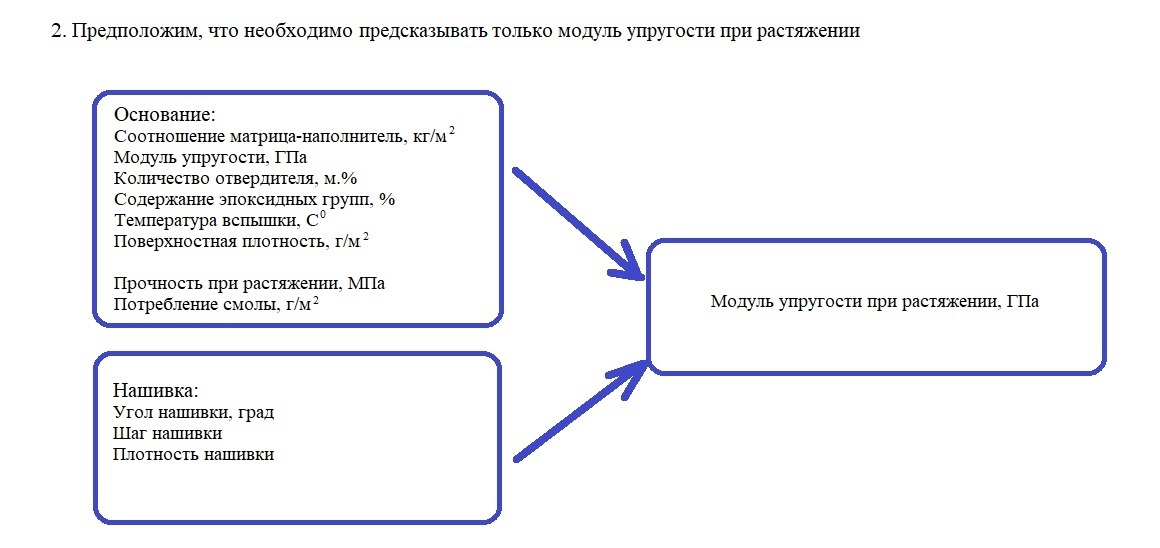

In [ ]:
from IPython.display import Image
Image(filename=data_path + 'separation2.jpg')

In [ ]:
#Разбиваем данные на обучающую и тестовую выборки (4 вариант)
X_my = clear.drop(['y_my'], axis=1)
y_my = clear['y_my']

X_train_my, X_test_my, y_train_my, y_test_my = train_test_split(X_my, y_my, test_size=0.3, random_state=19)

#Разбиваем данные на обучающую и тестовую выборки (5 вариант)
X_my_min_max = df_min_max.drop(['y_my'], axis=1)
y_my_min_max = df_min_max['y_my']

X_train_my_min_max, X_test_my_min_max, y_train_my_min_max, y_test_my_min_max = train_test_split(X_my_min_max, y_my_min_max, test_size=0.3, random_state=19)

#Разбиваем данные на обучающую и тестовую выборки (6 вариант)
X_my_st = df_st.drop(['y_my'], axis=1)
y_my_st = df_st['y_my']

X_train_my_st, X_test_my_st, y_train_my_st, y_test_my_st = train_test_split(X_my_st, y_my_st, test_size=0.3, random_state=19)

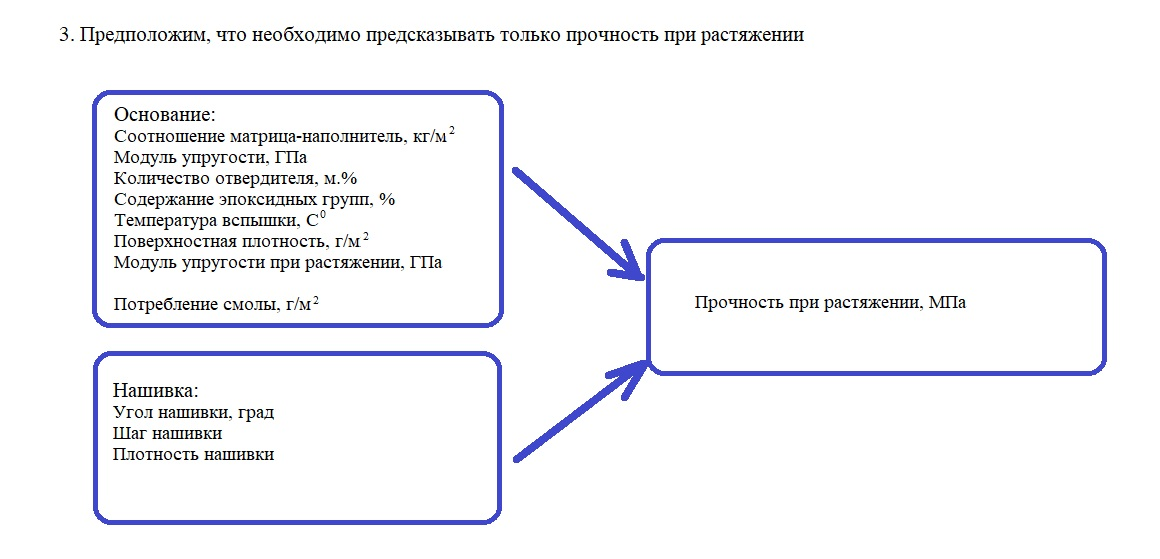

In [ ]:
from IPython.display import Image
Image(filename=data_path + 'separation3.jpg')

In [ ]:
#Разбиваем данные на обучающую и тестовую выборки (7 вариант)
X_pr = clear.drop(['y_pr'], axis=1)
y_pr = clear['y_pr']

X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(X_pr, y_pr, test_size=0.3, random_state=19)

#Разбиваем данные на обучающую и тестовую выборки (8 вариант)
X_pr_min_max = df_min_max.drop(['y_pr'], axis=1)
y_pr_min_max = df_min_max['y_pr']

X_train_pr_min_max, X_test_pr_min_max, y_train_pr_min_max, y_test_pr_min_max = train_test_split(X_pr_min_max, y_pr_min_max, test_size=0.3, random_state=19)

#Разбиваем данные на обучающую и тестовую выборки (9 вариант)
X_pr_st = df_st.drop(['y_pr'], axis=1)
y_pr_st = df_st['y_pr']

X_train_pr_st, X_test_pr_st, y_train_pr_st, y_test_pr_st = train_test_split(X_pr_st, y_pr_st, test_size=0.3, random_state=19)

##Функции и подготовка таблиц для внесения метрик

Создадим 4 датасета, в которые будем записывать метрики качества моделей

In [ ]:
df_my = pd.DataFrame(columns=['Модель', 'MSE', 'MSE_test','RMSE', 'RMSE_test','MAE','MAE_test','MAXE','MAXE_test','R2','R2_test'])
df_pr = pd.DataFrame(columns=['Модель', 'MSE', 'MSE_test','RMSE', 'RMSE_test','MAE','MAE_test','MAXE','MAXE_test','R2','R2_test'])

In [ ]:
df_my_norm = pd.DataFrame(columns=['Модель', 'MSE', 'MSE_test','RMSE', 'RMSE_test','MAE','MAE_test','MAXE','MAXE_test','R2','R2_test'])
df_pr_norm = pd.DataFrame(columns=['Модель', 'MSE', 'MSE_test','RMSE', 'RMSE_test','MAE','MAE_test','MAXE','MAXE_test','R2','R2_test'])

In [ ]:
df_my_ns = pd.DataFrame(columns=['Модель', 'MSE', 'MSE_test','RMSE', 'RMSE_test','MAE','MAE_test','MAXE','MAXE_test','R2','R2_test'])
df_pr_ns = pd.DataFrame(columns=['Модель', 'MSE', 'MSE_test','RMSE', 'RMSE_test','MAE','MAE_test','MAXE','MAXE_test','R2','R2_test'])

Напишем функцию для добавления строк с метриками качества моделей

In [ ]:
def app_metric_quality(dfy, name, y_predict_train, y_predict_test, y_train, y_test):
  MSE=mean_squared_error(y_train, y_predict_train).round(3)
  MSE_test=mean_squared_error(y_test, y_predict_test).round(3)
  RMSE=mean_squared_error(y_train, y_predict_train, squared = False).round(3)
  RMSE_test=mean_squared_error(y_test, y_predict_test, squared = False).round(3)
  MAE=mean_absolute_error(y_train, y_predict_train).round(3)
  MAE_test=mean_absolute_error(y_test, y_predict_test).round(3)
  MAXE=max_error(y_train, y_predict_train).round(3)
  MAXE_test=max_error(y_test, y_predict_test).round(3)
  R2=r2_score(y_train, y_predict_train).round(3)
  R2_test=r2_score(y_test, y_predict_test).round(3)
  dfy.loc[ len(dfy.index )] = [name, MSE, MSE_test,RMSE, RMSE_test,MAE,MAE_test,MAXE,MAXE_test,R2,R2_test] 

##Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Предсказание параметра Модуля упругости при растяжении как одного из двух целевых

regr=LinearRegression().fit(X_train_2par, y_train_2par_my)
y_pred=regr.predict(X_train_2par)
print('Начальное значение:\n',regr.intercept_)
print ('Коэффициенты:\n',regr.coef_)
y_pred_test=regr.predict(X_test_2par)
 

Начальное значение:
 68.84603832340309
Коэффициенты:
 [ 0.06771076  0.00073607  0.00012183 -0.01204244  0.10978246  0.00467555
  0.00058298  0.00163738  0.12166059 -0.0678492   0.00168926]


In [ ]:
app_metric_quality(df_my,'linearReg_2par', y_pred, y_pred_test, y_train_2par_my,y_test_2par_my)
df_my


Модель    MSE  MSE_test  RMSE  RMSE_test    MAE  MAE_test   MAXE  \
0  linearReg_2par  9.799     9.008  3.13      3.001  2.512     2.429  8.771   

   MAXE_test     R2  R2_test  
0      8.557  0.027   -0.028

In [ ]:
#Предсказание параметра Прочность при растяжении как одного из двух целевых

regr_pr=LinearRegression().fit(X_train_2par, y_train_2par_pr)
y_pred_pr=regr_pr.predict(X_train_2par)
print('Начальное значение:\n',regr_pr.intercept_)
print ('Коэффициенты:\n',regr_pr.coef_)
y_pred_test_pr=regr_pr.predict(X_test_2par) 

Начальное значение:
 3745.497507806086
Коэффициенты:
 [21.38472989 -0.6250106   0.03188296 -1.53609437  3.82813973 -0.48059324
 -0.03701137  0.36898952  6.26263518 -6.02533615  1.4131434 ]


In [ ]:
app_metric_quality(df_pr,'linearReg_2par', y_pred_pr, y_pred_test_pr, y_train_2par_pr,y_test_2par_pr)
df_pr

Модель         MSE    MSE_test     RMSE  RMSE_test      MAE  \
0  linearReg_2par  226663.296  245179.087  476.092    495.156  378.171   

   MAE_test      MAXE  MAXE_test     R2  R2_test  
0   387.748  1463.582   1419.945  0.026   -0.028

In [ ]:
regr_my1=LinearRegression().fit(X_train_my, y_train_my)
y_pred_my1=regr_my1.predict(X_train_my)
print('Начальное значение:\n',regr_my1.intercept_)
print ('Коэффициенты:\n',regr_my1.coef_)
y_pred_test_my1=regr_my1.predict(X_test_my)
app_metric_quality(df_my,'linearReg_1par', y_pred_my1, y_pred_test_my1, y_train_my,y_test_my)
df_my


Начальное значение:
 69.42413514466679
Коэффициенты:
 [ 0.07101138  0.0006396   0.00012676 -0.01227953  0.11037332  0.00460137
  0.00057727 -0.00015434  0.00169433  0.12262719 -0.06877918  0.00190737]


Модель    MSE  MSE_test   RMSE  RMSE_test    MAE  MAE_test   MAXE  \
0  linearReg_2par  9.799     9.008  3.130      3.001  2.512     2.429  8.771   
1  linearReg_1par  9.793     9.009  3.129      3.002  2.509     2.425  8.899   

   MAXE_test     R2  R2_test  
0      8.557  0.027   -0.028  
1      8.416  0.028   -0.028

In [ ]:
regr_pr1=LinearRegression().fit(X_train_pr, y_train_pr)
y_pred_pr1=regr_pr1.predict(X_train_pr)
print('Начальное значение:\n',regr_pr1.intercept_)
print ('Коэффициенты:\n',regr_pr1.coef_)
y_pred_test_pr1=regr_pr1.predict(X_test_pr)
app_metric_quality(df_pr,'linearReg_1par', y_pred_pr1, y_pred_test_pr1, y_train_pr,y_test_pr)
df_pr

Начальное значение:
 3991.295450441427
Коэффициенты:
 [21.62647461 -0.62238264  0.03231794 -1.57908897  4.22009117 -0.46390034
 -0.03492998 -3.57025544  0.37483539  6.69699457 -6.26757513  1.4191745 ]


Модель         MSE    MSE_test     RMSE  RMSE_test      MAE  \
0  linearReg_2par  226663.296  245179.087  476.092    495.156  378.171   
1  linearReg_1par  226538.393  245194.615  475.960    495.171  378.408   

   MAE_test      MAXE  MAXE_test     R2  R2_test  
0   387.748  1463.582   1419.945  0.026   -0.028  
1   387.558  1463.338   1426.121  0.027   -0.028

##Lasso

Это метод также называют методом штрафной регрессии. Lasso — это сокращение от Least Absolute Shrinkage and S selection Operator, который используется как для регуляризации, так и для выбора модели. Если в модели используется метод регуляризации L1 , то это называется регрессией лассо.
Альфа (α) — это величина усадки (или ограничения). Она может быть любым действительным числом от нуля до бесконечности; чем больше значение, тем более агрессивным является наказание.

In [ ]:
laso =Lasso()
params = {'alpha' : [0.0001, 0.001,0.01, 0.1, 1, 10,100,1000]}
GSCV_upr = GridSearchCV(laso, params, cv=10, verbose=0)
GSCV_upr.fit(X_train_2par, np.ravel(y_train_2par_my))
GSCV_upr.best_params_

{'alpha': 100}

In [ ]:
regr=Lasso(alpha = 100).fit(X_train_2par, y_train_2par_my)
y_pred=regr.predict(X_train_2par)
y_pred_test=regr.predict(X_test_2par)
app_metric_quality(df_my,'lasso_2par', y_pred, y_pred_test, y_train_2par_my,y_test_2par_my)

In [ ]:
GSCV_upr = GridSearchCV(laso, params, cv=10, verbose=0)
GSCV_upr.fit(X_train_2par, np.ravel(y_train_2par_pr))
GSCV_upr.best_params_

{'alpha': 100}

In [ ]:
regr=Lasso(alpha = 100).fit(X_train_2par, y_train_2par_pr)
y_pred=regr.predict(X_train_2par)
y_pred_test=regr.predict(X_test_2par)
app_metric_quality(df_pr,'lasso_2par', y_pred, y_pred_test, y_train_2par_pr,y_test_2par_pr)

In [ ]:
GSCV_upr = GridSearchCV(laso, params, cv=10, verbose=0)
GSCV_upr.fit(X_train_my, np.ravel(y_train_my))
GSCV_upr.best_params_

{'alpha': 100}

In [ ]:
regr=Lasso(alpha = 100).fit(X_train_my, y_train_my)
y_pred=regr.predict(X_train_my)
y_pred_test=regr.predict(X_test_my)
app_metric_quality(df_my,'lasso_1par', y_pred, y_pred_test, y_train_my,y_test_my)
df_my

Модель     MSE  MSE_test   RMSE  RMSE_test    MAE  MAE_test   MAXE  \
0  linearReg_2par   9.799     9.008  3.130      3.001  2.512     2.429  8.771   
1  linearReg_1par   9.793     9.009  3.129      3.002  2.509     2.425  8.899   
2      lasso_2par  10.075     8.785  3.174      2.964  2.539     2.396  9.320   
3      lasso_1par  10.075     8.785  3.174      2.964  2.539     2.396  9.320   

   MAXE_test     R2  R2_test  
0      8.557  0.027   -0.028  
1      8.416  0.028   -0.028  
2      8.055  0.000   -0.002  
3      8.055  0.000   -0.002

In [ ]:
GSCV_upr = GridSearchCV(laso, params, cv=10, verbose=0)
GSCV_upr.fit(X_train_pr, np.ravel(y_train_pr))
GSCV_upr.best_params_

{'alpha': 100}

In [ ]:
regr=Lasso(alpha = 100).fit(X_train_pr, y_train_pr)
y_pred=regr.predict(X_train_pr)
y_pred_test=regr.predict(X_test_pr)
app_metric_quality(df_pr,'lasso_1par', y_pred, y_pred_test, y_train_pr,y_test_pr)
df_pr

Модель         MSE    MSE_test     RMSE  RMSE_test      MAE  \
0  linearReg_2par  226663.296  245179.087  476.092    495.156  378.171   
1  linearReg_1par  226538.393  245194.615  475.960    495.171  378.408   
2      lasso_2par  227454.290  244590.549  476.922    494.561  379.067   
3      lasso_1par  227454.290  244590.549  476.922    494.561  379.067   

   MAE_test      MAXE  MAXE_test     R2  R2_test  
0   387.748  1463.582   1419.945  0.026   -0.028  
1   387.558  1463.338   1426.121  0.027   -0.028  
2   386.359  1424.382   1456.175  0.023   -0.026  
3   386.359  1424.382   1456.175  0.023   -0.026

##Ridge

Эта модель решает модель регрессии, в которой функция потерь является линейной функцией наименьших квадратов, а регуляризация задается нормой l2. Также известна как регрессия хребта или регуляризация по Тихонову. 

In [ ]:
ridg =Ridge()
r_params = {'alpha' : [1, 10,100,1000,10000,100000,1000000,10000000]}
GSCV_r_upr = GridSearchCV(ridg, r_params, cv=10, verbose=0)
GSCV_r_upr.fit(X_train_2par, np.ravel(y_train_2par_my))
GSCV_r_upr.best_params_

{'alpha': 1000000}

In [ ]:
regr=Ridge(alpha = 1000000).fit(X_train_2par, y_train_2par_my)
y_pred=regr.predict(X_train_2par)
y_pred_test=regr.predict(X_test_2par)
app_metric_quality(df_my,'Ridge_2par', y_pred, y_pred_test, y_train_2par_my,y_test_2par_my)

In [ ]:
GSCV_r_upr = GridSearchCV(ridg, r_params, cv=10, verbose=0)
GSCV_r_upr.fit(X_train_2par, np.ravel(y_train_2par_pr))
GSCV_r_upr.best_params_

{'alpha': 1000000}

In [ ]:
regr=Ridge(alpha = 1000000).fit(X_train_2par, y_train_2par_pr)
y_pred=regr.predict(X_train_2par)
y_pred_test=regr.predict(X_test_2par)
app_metric_quality(df_pr,'Ridge_2par', y_pred, y_pred_test, y_train_2par_pr,y_test_2par_pr)

In [ ]:
GSCV_r_upr = GridSearchCV(ridg, r_params, cv=10, verbose=0)
GSCV_r_upr.fit(X_train_my, np.ravel(y_train_my))
GSCV_r_upr.best_params_

{'alpha': 1000000}

In [ ]:
regr=Ridge(alpha = 1000000).fit(X_train_my, y_train_my)
y_pred=regr.predict(X_train_my)
y_pred_test=regr.predict(X_test_my)
app_metric_quality(df_my,'Ridge_1par', y_pred, y_pred_test, y_train_my,y_test_my)
df_my

Модель     MSE  MSE_test   RMSE  RMSE_test    MAE  MAE_test   MAXE  \
0  linearReg_2par   9.799     9.008  3.130      3.001  2.512     2.429  8.771   
1  linearReg_1par   9.793     9.009  3.129      3.002  2.509     2.425  8.899   
2      lasso_2par  10.075     8.785  3.174      2.964  2.539     2.396  9.320   
3      lasso_1par  10.075     8.785  3.174      2.964  2.539     2.396  9.320   
4      Ridge_2par   9.958     8.816  3.156      2.969  2.526     2.401  9.138   
5      Ridge_1par   9.956     8.813  3.155      2.969  2.525     2.399  9.214   

   MAXE_test     R2  R2_test  
0      8.557  0.027   -0.028  
1      8.416  0.028   -0.028  
2      8.055  0.000   -0.002  
3      8.055  0.000   -0.002  
4      8.281  0.012   -0.006  
5      8.197  0.012   -0.006

In [ ]:
GSCV_r_upr = GridSearchCV(ridg, r_params, cv=10, verbose=0)
GSCV_r_upr.fit(X_train_pr, np.ravel(y_train_pr))
GSCV_r_upr.best_params_

{'alpha': 1000000}

In [ ]:
regr=Ridge(alpha = 1000000).fit(X_train_pr, y_train_pr)
y_pred=regr.predict(X_train_pr)
y_pred_test=regr.predict(X_test_pr)
app_metric_quality(df_pr,'Ridge_1par', y_pred, y_pred_test, y_train_pr,y_test_pr)
df_pr

Модель         MSE    MSE_test     RMSE  RMSE_test      MAE  \
0  linearReg_2par  226663.296  245179.087  476.092    495.156  378.171   
1  linearReg_1par  226538.393  245194.615  475.960    495.171  378.408   
2      lasso_2par  227454.290  244590.549  476.922    494.561  379.067   
3      lasso_1par  227454.290  244590.549  476.922    494.561  379.067   
4      Ridge_2par  228575.612  242411.133  478.096    492.353  379.906   
5      Ridge_1par  228574.940  242410.325  478.095    492.352  379.907   

   MAE_test      MAXE  MAXE_test     R2  R2_test  
0   387.748  1463.582   1419.945  0.026   -0.028  
1   387.558  1463.338   1426.121  0.027   -0.028  
2   386.359  1424.382   1456.175  0.023   -0.026  
3   386.359  1424.382   1456.175  0.023   -0.026  
4   384.318  1389.059   1445.624  0.018   -0.017  
5   384.316  1389.047   1445.648  0.018   -0.017

##DecisionTreeRegressor

Модель предсказывает значение целевой переменной, изучая простые правила принятия решений, выведенные из характеристик данных. Чем глубже дерево, тем сложнее правила принятия решений. Метод не требует нормализации данных и может работать как с числовыми, так и категориальными параметрами.  Деревья решений могут создавать слишком сложные деревья, которые плохо обобщают данные. Это называется переобучением. Чтобы избежать этой проблемы можно установить, например, максимальную глубину дерева.

In [ ]:
#Поиск наилучших параметров
tree = DecisionTreeRegressor()
params = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'max_depth' : range(2, 10, 1)}
GSCV_upr = GridSearchCV(tree, params, cv=10, verbose=0)
GSCV_upr.fit(X_train_2par, np.ravel(y_train_2par_my))
GSCV_upr.best_params_

{'criterion': 'poisson', 'max_depth': 2}

In [ ]:
regr=DecisionTreeRegressor(criterion='poisson', max_depth = 2 ).fit(X_train_2par, y_train_2par_my)
y_pred=regr.predict(X_train_2par)
y_pred_test=regr.predict(X_test_2par)
app_metric_quality(df_my,'DecisionTreeRegressor_2par', y_pred, y_pred_test, y_train_2par_my,y_test_2par_my)

In [ ]:
GSCV_upr = GridSearchCV(tree, params, cv=10, verbose=0)
GSCV_upr.fit(X_train_2par, np.ravel(y_train_2par_pr))
GSCV_upr.best_params_

{'criterion': 'poisson', 'max_depth': 2}

In [ ]:
regr=DecisionTreeRegressor(criterion='poisson', max_depth =2 ).fit(X_train_2par, y_train_2par_pr)
y_pred=regr.predict(X_train_2par)
y_pred_test=regr.predict(X_test_2par)
app_metric_quality(df_pr,'DecisionTreeRegressor_2par', y_pred, y_pred_test, y_train_2par_pr,y_test_2par_pr)

In [ ]:
GSCV_upr = GridSearchCV(tree, params, cv=10, verbose=0)
GSCV_upr.fit(X_train_my, np.ravel(y_train_my))
GSCV_upr.best_params_

{'criterion': 'poisson', 'max_depth': 2}

In [ ]:
regr=DecisionTreeRegressor(criterion='poisson', max_depth =2 ).fit(X_train_my, y_train_my)
y_pred=regr.predict(X_train_my)
y_pred_test=regr.predict(X_test_my)
app_metric_quality(df_my,'DecisionTreeRegressor_1par', y_pred, y_pred_test, y_train_my,y_test_my)
df_my

Модель     MSE  MSE_test   RMSE  RMSE_test    MAE  \
0              linearReg_2par   9.799     9.008  3.130      3.001  2.512   
1              linearReg_1par   9.793     9.009  3.129      3.002  2.509   
2                  lasso_2par  10.075     8.785  3.174      2.964  2.539   
3                  lasso_1par  10.075     8.785  3.174      2.964  2.539   
4                  Ridge_2par   9.958     8.816  3.156      2.969  2.526   
5                  Ridge_1par   9.956     8.813  3.155      2.969  2.525   
6  DecisionTreeRegressor_2par   9.645     8.888  3.106      2.981  2.483   
7  DecisionTreeRegressor_1par   9.645     8.888  3.106      2.981  2.483   

   MAE_test   MAXE  MAXE_test     R2  R2_test  
0     2.429  8.771      8.557  0.027   -0.028  
1     2.425  8.899      8.416  0.028   -0.028  
2     2.396  9.320      8.055  0.000   -0.002  
3     2.396  9.320      8.055  0.000   -0.002  
4     2.401  9.138      8.281  0.012   -0.006  
5     2.399  9.214      8.197  0.012   -0.006  
6     2.398  9.276      8.822  0.043   -0.014  
7     2.398  9.276      8.822  0.043   -0.014

In [ ]:
GSCV_upr = GridSearchCV(tree, params, cv=10, verbose=0)
GSCV_upr.fit(X_train_pr, np.ravel(y_train_pr))
GSCV_upr.best_params_

{'criterion': 'poisson', 'max_depth': 2}

In [ ]:
regr=DecisionTreeRegressor(criterion='poisson', max_depth =2 ).fit(X_train_pr, y_train_pr)
y_pred=regr.predict(X_train_pr)
y_pred_test=regr.predict(X_test_pr)
app_metric_quality(df_pr,'DecisionTreeRegressor_1par', y_pred, y_pred_test, y_train_pr,y_test_pr)
df_pr

Модель         MSE    MSE_test     RMSE  RMSE_test  \
0              linearReg_2par  226663.296  245179.087  476.092    495.156   
1              linearReg_1par  226538.393  245194.615  475.960    495.171   
2                  lasso_2par  227454.290  244590.549  476.922    494.561   
3                  lasso_1par  227454.290  244590.549  476.922    494.561   
4                  Ridge_2par  228575.612  242411.133  478.096    492.353   
5                  Ridge_1par  228574.940  242410.325  478.095    492.352   
6  DecisionTreeRegressor_2par  222357.785  253048.154  471.548    503.039   
7  DecisionTreeRegressor_1par  222357.785  253048.154  471.548    503.039   

       MAE  MAE_test      MAXE  MAXE_test     R2  R2_test  
0  378.171   387.748  1463.582   1419.945  0.026   -0.028  
1  378.408   387.558  1463.338   1426.121  0.027   -0.028  
2  379.067   386.359  1424.382   1456.175  0.023   -0.026  
3  379.067   386.359  1424.382   1456.175  0.023   -0.026  
4  379.906   384.318  1389.059   1445.624  0.018   -0.017  
5  379.907   384.316  1389.047   1445.648  0.018   -0.017  
6  374.571   395.464  1495.430   1486.179  0.045   -0.061  
7  374.571   395.464  1495.430   1486.179  0.045   -0.061

##RandomForestRegressor

Алгоритм случайного леса (Random Forest) — универсальный алгоритм машинного обучения, суть которого состоит в использовании ансамбля решающих деревьев. Само по себе решающее дерево предоставляет крайне невысокое качество классификации, но из-за большого их количества результат значительно улучшается. 

In [ ]:
#Поиск наилучших параметров
trees = RandomForestRegressor()
params = {'n_estimators': range(5, 20, 5), 'criterion' :['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], 'max_depth' : range(2, 6, 2),'max_features': ['sqrt', 'log2', None]}
GSCV_upr = GridSearchCV(trees, params, cv=10, verbose=1)
GSCV_upr.fit(X_train_2par, np.ravel(y_train_2par_my))
GSCV_upr.best_params_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


{'criterion': 'friedman_mse',
 'max_depth': 2,
 'max_features': 'log2',
 'n_estimators': 5}

In [ ]:
regr=RandomForestRegressor(criterion='friedman_mse', max_depth = 2, max_features='log2', n_estimators=5).fit(X_train_2par, y_train_2par_my)
y_pred=regr.predict(X_train_2par)
y_pred_test=regr.predict(X_test_2par)
app_metric_quality(df_my,'RandomForestRegressor_2par', y_pred, y_pred_test, y_train_2par_my,y_test_2par_my)

In [ ]:
GSCV_upr = GridSearchCV(trees, params, cv=10, verbose=0)
GSCV_upr.fit(X_train_2par, np.ravel(y_train_2par_pr))
GSCV_upr.best_params_

{'criterion': 'poisson',
 'max_depth': 2,
 'max_features': 'log2',
 'n_estimators': 10}

In [ ]:
regr=RandomForestRegressor(criterion='poisson', max_depth = 2, max_features='log2', n_estimators=10).fit(X_train_2par, y_train_2par_pr)
y_pred=regr.predict(X_train_2par)
y_pred_test=regr.predict(X_test_2par)
app_metric_quality(df_pr,'RandomForestRegressor_2par', y_pred, y_pred_test, y_train_2par_pr,y_test_2par_pr)

In [ ]:
GSCV_upr = GridSearchCV(trees, params, cv=10, verbose=0)
GSCV_upr.fit(X_train_my, np.ravel(y_train_my))
GSCV_upr.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 2,
 'max_features': 'log2',
 'n_estimators': 15}

In [ ]:
regr=RandomForestRegressor(criterion='friedman_mse', max_depth = 2, max_features='log2', n_estimators=15).fit(X_train_my, y_train_my)
y_pred=regr.predict(X_train_my)
y_pred_test=regr.predict(X_test_my)
app_metric_quality(df_my,'RandomForestRegressor_1par', y_pred, y_pred_test, y_train_my,y_test_my)
df_my

Модель     MSE  MSE_test   RMSE  RMSE_test    MAE  \
0              linearReg_2par   9.799     9.008  3.130      3.001  2.512   
1              linearReg_1par   9.793     9.009  3.129      3.002  2.509   
2                  lasso_2par  10.075     8.785  3.174      2.964  2.539   
3                  lasso_1par  10.075     8.785  3.174      2.964  2.539   
4                  Ridge_2par   9.958     8.816  3.156      2.969  2.526   
5                  Ridge_1par   9.956     8.813  3.155      2.969  2.525   
6  DecisionTreeRegressor_2par   9.645     8.888  3.106      2.981  2.483   
7  DecisionTreeRegressor_1par   9.645     8.888  3.106      2.981  2.483   
8  RandomForestRegressor_2par   9.652     8.805  3.107      2.967  2.476   
9  RandomForestRegressor_1par   9.592     8.853  3.097      2.975  2.470   

   MAE_test   MAXE  MAXE_test     R2  R2_test  
0     2.429  8.771      8.557  0.027   -0.028  
1     2.425  8.899      8.416  0.028   -0.028  
2     2.396  9.320      8.055  0.000   -0.002  
3     2.396  9.320      8.055  0.000   -0.002  
4     2.401  9.138      8.281  0.012   -0.006  
5     2.399  9.214      8.197  0.012   -0.006  
6     2.398  9.276      8.822  0.043   -0.014  
7     2.398  9.276      8.822  0.043   -0.014  
8     2.404  9.945      8.031  0.042   -0.005  
9     2.424  9.209      8.208  0.048   -0.010

In [ ]:
GSCV_upr = GridSearchCV(trees, params, cv=10, verbose=0)
GSCV_upr.fit(X_train_pr, np.ravel(y_train_pr))
GSCV_upr.best_params_

{'criterion': 'poisson',
 'max_depth': 2,
 'max_features': 'sqrt',
 'n_estimators': 15}

In [ ]:
regr=RandomForestRegressor(criterion='poisson', max_depth = 2, max_features='sqrt', n_estimators=15).fit(X_train_pr, y_train_pr)
y_pred=regr.predict(X_train_pr)
y_pred_test=regr.predict(X_test_pr)
app_metric_quality(df_pr,'RandomForestRegressor_1par', y_pred, y_pred_test, y_train_pr,y_test_pr)
df_pr

Модель         MSE    MSE_test     RMSE  RMSE_test  \
0              linearReg_2par  226663.296  245179.087  476.092    495.156   
1              linearReg_1par  226538.393  245194.615  475.960    495.171   
2                  lasso_2par  227454.290  244590.549  476.922    494.561   
3                  lasso_1par  227454.290  244590.549  476.922    494.561   
4                  Ridge_2par  228575.612  242411.133  478.096    492.353   
5                  Ridge_1par  228574.940  242410.325  478.095    492.352   
6  DecisionTreeRegressor_2par  222357.785  253048.154  471.548    503.039   
7  DecisionTreeRegressor_1par  222357.785  253048.154  471.548    503.039   
8  RandomForestRegressor_2par  219987.934  243243.379  469.029    493.197   
9  RandomForestRegressor_1par  220886.247  242513.752  469.985    492.457   

       MAE  MAE_test      MAXE  MAXE_test     R2  R2_test  
0  378.171   387.748  1463.582   1419.945  0.026   -0.028  
1  378.408   387.558  1463.338   1426.121  0.027   -0.028  
2  379.067   386.359  1424.382   1456.175  0.023   -0.026  
3  379.067   386.359  1424.382   1456.175  0.023   -0.026  
4  379.906   384.318  1389.059   1445.624  0.018   -0.017  
5  379.907   384.316  1389.047   1445.648  0.018   -0.017  
6  374.571   395.464  1495.430   1486.179  0.045   -0.061  
7  374.571   395.464  1495.430   1486.179  0.045   -0.061  
8  371.650   383.900  1326.343   1430.820  0.055   -0.020  
9  374.166   383.189  1343.324   1445.185  0.051   -0.017

##GradientBoostingRegressor

Используется для подгонки модели. Эта регрессионная модель с повышением градиента создает лес деревьев с максимальной глубиной 3 и наименьшими квадратными потерями. Алгоритм повышения градиента используется для создания ансамблевой модели путем объединения слабых обучающихся или слабых прогностических моделей.Процесс подбора модели начинается с константы, такой как среднее значение целевых значений. Градиенты обновляются в каждом итераторе (для каждой последующей оценки).

In [ ]:
#Поиск наилучших параметров
gbr = GradientBoostingRegressor()
params = {'loss':['squared_error', 'absolute_error','huber', 'quantile'],
              'n_estimators': range(20, 80, 10), 
              'criterion' :['friedman_mse', 'squared_error'], 
              'max_depth':range(2, 4, 1)
              }
GSCV_upr = GridSearchCV(gbr,params, cv=10, verbose=1)
GSCV_upr.fit(X_train_2par, np.ravel(y_train_2par_my))
GSCV_upr.best_params_

Fitting 10 folds for each of 96 candidates, totalling 960 fits


{'criterion': 'friedman_mse',
 'loss': 'absolute_error',
 'max_depth': 3,
 'n_estimators': 40}

In [ ]:
regr=GradientBoostingRegressor(criterion='friedman_mse',loss='absolute_error', max_depth = 3, n_estimators=40).fit(X_train_2par, y_train_2par_my)
y_pred=regr.predict(X_train_2par)
y_pred_test=regr.predict(X_test_2par)
app_metric_quality(df_my,'GradientBoostingRegressor_2par', y_pred, y_pred_test, y_train_2par_my,y_test_2par_my)

In [ ]:
GSCV_upr = GridSearchCV(gbr, params, cv=10, verbose=0)
GSCV_upr.fit(X_train_2par, np.ravel(y_train_2par_pr))
GSCV_upr.best_params_

{'criterion': 'squared_error',
 'loss': 'squared_error',
 'max_depth': 2,
 'n_estimators': 20}

In [ ]:
regr=GradientBoostingRegressor(criterion='squared_error',loss='squared_error', max_depth = 2, n_estimators=20).fit(X_train_2par, y_train_2par_pr)
y_pred=regr.predict(X_train_2par)
y_pred_test=regr.predict(X_test_2par)
app_metric_quality(df_pr,'GradientBoostingRegressor_2par', y_pred, y_pred_test, y_train_2par_pr,y_test_2par_pr)

In [ ]:
GSCV_upr = GridSearchCV(gbr, params, cv=10, verbose=0)
GSCV_upr.fit(X_train_my, np.ravel(y_train_my))
GSCV_upr.best_params_

{'criterion': 'friedman_mse',
 'loss': 'absolute_error',
 'max_depth': 3,
 'n_estimators': 40}

In [ ]:
regr=GradientBoostingRegressor(criterion='friedman_mse',loss='absolute_error', max_depth = 3, n_estimators=40).fit(X_train_my, y_train_my)
y_pred=regr.predict(X_train_my)
y_pred_test=regr.predict(X_test_my)
app_metric_quality(df_my,'GradientBoostingRegressor_1par', y_pred, y_pred_test, y_train_my,y_test_my)
df_my

Модель     MSE  MSE_test   RMSE  RMSE_test    MAE  \
0                   linearReg_2par   9.799     9.008  3.130      3.001  2.512   
1                   linearReg_1par   9.793     9.009  3.129      3.002  2.509   
2                       lasso_2par  10.075     8.785  3.174      2.964  2.539   
3                       lasso_1par  10.075     8.785  3.174      2.964  2.539   
4                       Ridge_2par   9.958     8.816  3.156      2.969  2.526   
5                       Ridge_1par   9.956     8.813  3.155      2.969  2.525   
6       DecisionTreeRegressor_2par   9.645     8.888  3.106      2.981  2.483   
7       DecisionTreeRegressor_1par   9.645     8.888  3.106      2.981  2.483   
8       RandomForestRegressor_2par   9.652     8.805  3.107      2.967  2.476   
9       RandomForestRegressor_1par   9.592     8.853  3.097      2.975  2.470   
10  GradientBoostingRegressor_2par   8.382     9.074  2.895      3.012  2.189   
11  GradientBoostingRegressor_1par   8.543     9.116  2.923      3.019  2.225   

    MAE_test   MAXE  MAXE_test     R2  R2_test  
0      2.429  8.771      8.557  0.027   -0.028  
1      2.425  8.899      8.416  0.028   -0.028  
2      2.396  9.320      8.055  0.000   -0.002  
3      2.396  9.320      8.055  0.000   -0.002  
4      2.401  9.138      8.281  0.012   -0.006  
5      2.399  9.214      8.197  0.012   -0.006  
6      2.398  9.276      8.822  0.043   -0.014  
7      2.398  9.276      8.822  0.043   -0.014  
8      2.404  9.945      8.031  0.042   -0.005  
9      2.424  9.209      8.208  0.048   -0.010  
10     2.437  9.412      8.254  0.168   -0.035  
11     2.439  9.285      8.340  0.152   -0.040

In [ ]:
GSCV_upr = GridSearchCV(gbr, params, cv=10, verbose=0)
GSCV_upr.fit(X_train_pr, np.ravel(y_train_pr))
GSCV_upr.best_params_

{'criterion': 'friedman_mse',
 'loss': 'absolute_error',
 'max_depth': 2,
 'n_estimators': 20}

In [ ]:
regr=GradientBoostingRegressor(criterion='friedman_mse',loss='absolute_error', max_depth = 2, n_estimators=20).fit(X_train_pr, y_train_pr)
y_pred=regr.predict(X_train_pr)
y_pred_test=regr.predict(X_test_pr)
app_metric_quality(df_pr,'GradientBoostingRegressor_1par', y_pred, y_pred_test, y_train_pr,y_test_pr)
df_pr

Модель         MSE    MSE_test     RMSE  \
0                   linearReg_2par  226663.296  245179.087  476.092   
1                   linearReg_1par  226538.393  245194.615  475.960   
2                       lasso_2par  227454.290  244590.549  476.922   
3                       lasso_1par  227454.290  244590.549  476.922   
4                       Ridge_2par  228575.612  242411.133  478.096   
5                       Ridge_1par  228574.940  242410.325  478.095   
6       DecisionTreeRegressor_2par  222357.785  253048.154  471.548   
7       DecisionTreeRegressor_1par  222357.785  253048.154  471.548   
8       RandomForestRegressor_2par  219987.934  243243.379  469.029   
9       RandomForestRegressor_1par  220886.247  242513.752  469.985   
10  GradientBoostingRegressor_2par  209183.736  239005.546  457.366   
11  GradientBoostingRegressor_1par  216251.658  241632.693  465.029   

    RMSE_test      MAE  MAE_test      MAXE  MAXE_test     R2  R2_test  
0     495.156  378.171   387.748  1463.582   1419.945  0.026   -0.028  
1     495.171  378.408   387.558  1463.338   1426.121  0.027   -0.028  
2     494.561  379.067   386.359  1424.382   1456.175  0.023   -0.026  
3     494.561  379.067   386.359  1424.382   1456.175  0.023   -0.026  
4     492.353  379.906   384.318  1389.059   1445.624  0.018   -0.017  
5     492.352  379.907   384.316  1389.047   1445.648  0.018   -0.017  
6     503.039  374.571   395.464  1495.430   1486.179  0.045   -0.061  
7     503.039  374.571   395.464  1495.430   1486.179  0.045   -0.061  
8     493.197  371.650   383.900  1326.343   1430.820  0.055   -0.020  
9     492.457  374.166   383.189  1343.324   1445.185  0.051   -0.017  
10    488.882  363.504   383.599  1278.574   1436.614  0.102   -0.002  
11    491.561  363.204   383.893  1400.519   1449.356  0.071   -0.013

Сохраним полученные данные в файлы на диске

In [ ]:
df_pr.to_excel(data_path + 'metric_pr.xlsx')
df_my.to_excel(data_path + 'metric_my.xlsx')

##Стахостический градиентный спуск

Для сравнения моделей, работающих с нормализованными данными, используем отдельные таблицы

Преимущества:

1. Эффективность.
2. Простота реализации (множество возможностей для настройки кода).

Недостатки:

1. SGD требует ряда гиперпараметров, таких как параметр регуляризации и количество итераций.
2. SGD чувствителен к масштабированию функций.

In [ ]:
#Поиск наилучших параметров
sgd = SGDRegressor()
params = {'loss' : ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 
          'penalty' : ['elasticnet', 'l2', 'l1'],
          'alpha' : [0.0001, 0.001, 0.01, 0.0002, 0.002],
          'learning_rate' : ['optimal', 'invscaling', 'adaptive'],
          'epsilon' : [0.1, 0.01, 0.2, 0.02]
          }
GSCV_upr = GridSearchCV(sgd, params, cv=10, verbose=1)
GSCV_upr.fit(X_train_2par_min_max, np.ravel(y_train_2par_my_min_max))
GSCV_upr.best_params_

{'alpha': 0.002,
 'epsilon': 0.01,
 'learning_rate': 'optimal',
 'loss': 'squared_epsilon_insensitive',
 'penalty': 'l1'}

In [ ]:
reg = SGDRegressor(alpha=0.002, epsilon=0.01, learning_rate='optimal', loss='squared_epsilon_insensitive', penalty= 'l1').fit(X_train_2par_min_max,y_train_2par_my_min_max)
y_pred=reg.predict(X_train_2par_min_max).round(3)
y_pred_test=reg.predict(X_test_2par_min_max).round(3)
app_metric_quality(df_my_norm,'SGDRegressor_2par_min_max', y_pred, y_pred_test, y_train_2par_my_min_max,y_test_2par_my_min_max)

In [ ]:
GSCV_upr = GridSearchCV(sgd, params, cv=10, verbose=1)
GSCV_upr.fit(X_train_my_min_max, np.ravel(y_train_my_min_max))
GSCV_upr.best_params_

{'alpha': 0.01,
 'epsilon': 0.2,
 'learning_rate': 'optimal',
 'loss': 'huber',
 'penalty': 'elasticnet'}

In [ ]:
reg = SGDRegressor(alpha=0.01, epsilon=0.2, learning_rate='optimal', loss='huber', penalty= 'elasticnet').fit(X_train_my_min_max, y_train_my_min_max)
y_pred=reg.predict(X_train_my_min_max).round(3)
y_pred_test=reg.predict(X_test_my_min_max).round(3)
app_metric_quality(df_my_norm,'SGDRegressor_1par_min_max', y_pred, y_pred_test, y_train_my_min_max,y_test_my_min_max)

In [ ]:
GSCV_upr = GridSearchCV(sgd, params, cv=10, verbose=1)
GSCV_upr.fit(X_train_2par_st, np.ravel(y_train_2par_my_st))
GSCV_upr.best_params_

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


{'alpha': 0.001,
 'epsilon': 0.01,
 'learning_rate': 'invscaling',
 'loss': 'huber',
 'penalty': 'l2'}

In [ ]:
reg = SGDRegressor(alpha=0.001, epsilon=0.01, learning_rate='invscaling', loss='huber', penalty= 'l2').fit(X_train_2par_st,y_train_2par_my_st)
y_pred=reg.predict(X_train_2par_st).round(3)
y_pred_test=reg.predict(X_test_2par_st).round(3)
app_metric_quality(df_my_norm,'SGDRegressor_2par_st', y_pred, y_pred_test, y_train_2par_my_st,y_test_2par_my_st)

In [ ]:
GSCV_upr = GridSearchCV(sgd, params, cv=10, verbose=1)
GSCV_upr.fit(X_train_my_st, np.ravel(y_train_my_st))
GSCV_upr.best_params_

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


{'alpha': 0.0002,
 'epsilon': 0.01,
 'learning_rate': 'invscaling',
 'loss': 'huber',
 'penalty': 'elasticnet'}

In [ ]:
reg = SGDRegressor(alpha=0.0002, epsilon=0.01, learning_rate='invscaling', loss='huber', penalty= 'elasticnet').fit(X_train_my_st, y_train_my_st)
y_pred=reg.predict(X_train_my_st).round(3)
y_pred_test=reg.predict(X_test_my_st).round(3)
app_metric_quality(df_my_norm,'SGDRegressor_1par_st', y_pred, y_pred_test, y_train_my_st,y_test_my_st)
df_my_norm

Модель    MSE  MSE_test   RMSE  RMSE_test    MAE  \
0  SGDRegressor_2par_min_max  0.030     0.027  0.172      0.164  0.138   
1  SGDRegressor_1par_min_max  0.029     0.025  0.171      0.159  0.136   
2       SGDRegressor_2par_st  1.038     0.906  1.019      0.952  0.814   
3       SGDRegressor_1par_st  1.038     0.906  1.019      0.952  0.814   

   MAE_test   MAXE  MAXE_test     R2  R2_test  
0     0.133  0.519      0.438 -0.021   -0.062  
1     0.128  0.509      0.444 -0.002    0.001  
2     0.769  2.996      2.614  0.002   -0.001  
3     0.769  2.995      2.612  0.002   -0.001

In [ ]:
GSCV_upr = GridSearchCV(sgd, params, cv=10, verbose=1)
GSCV_upr.fit(X_train_2par_min_max, np.ravel(y_train_2par_pr_min_max))
GSCV_upr.best_params_

{'alpha': 0.001,
 'epsilon': 0.01,
 'learning_rate': 'optimal',
 'loss': 'huber',
 'penalty': 'l1'}

In [ ]:
reg = SGDRegressor(alpha=0.001, epsilon=0.01, learning_rate='optimal', loss='huber', penalty= 'l1').fit(X_train_2par_min_max, y_train_2par_pr_min_max)
y_pred=reg.predict(X_train_2par_min_max).round(3)
y_pred_test=reg.predict(X_test_2par_min_max).round(3)
app_metric_quality(df_pr_norm,'SGDRegressor_2par_min_max', y_pred, y_pred_test, y_train_2par_pr_min_max,y_test_2par_pr_min_max)

In [ ]:
GSCV_upr = GridSearchCV(sgd, params, cv=10, verbose=1)
GSCV_upr.fit(X_train_pr_min_max, np.ravel(y_train_pr_min_max))
GSCV_upr.best_params_

{'alpha': 0.002,
 'epsilon': 0.01,
 'learning_rate': 'optimal',
 'loss': 'squared_epsilon_insensitive',
 'penalty': 'l1'}

In [ ]:
reg = SGDRegressor(alpha=0.002, epsilon=0.01, learning_rate='optimal', loss='squared_epsilon_insensitive', penalty= 'l1').fit(X_train_pr_min_max, y_train_pr_min_max)
y_pred=reg.predict(X_train_pr_min_max).round(3)
y_pred_test=reg.predict(X_test_pr_min_max).round(3)
app_metric_quality(df_pr_norm,'SGDRegressor_1par_min_max', y_pred, y_pred_test, y_train_pr_min_max,y_test_pr_min_max)

In [ ]:
GSCV_upr = GridSearchCV(sgd, params, cv=10, verbose=1)
GSCV_upr.fit(X_train_2par_st, np.ravel(y_train_2par_pr_st))
GSCV_upr.best_params_

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


{'alpha': 0.01,
 'epsilon': 0.02,
 'learning_rate': 'optimal',
 'loss': 'squared_error',
 'penalty': 'elasticnet'}

In [ ]:
reg = SGDRegressor(alpha=0.01, epsilon=0.02, learning_rate='optimal', loss='squared_error', penalty= 'elasticnet').fit(X_train_2par_st, y_train_2par_pr_st)
y_pred=reg.predict(X_train_2par_st).round(3)
y_pred_test=reg.predict(X_test_2par_st).round(3)
app_metric_quality(df_pr_norm,'SGDRegressor_2par_st', y_pred, y_pred_test, y_train_2par_pr_st,y_test_2par_pr_st)

In [ ]:
GSCV_upr = GridSearchCV(sgd, params, cv=10, verbose=1)
GSCV_upr.fit(X_train_pr_st, np.ravel(y_train_pr_st))
GSCV_upr.best_params_

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


{'alpha': 0.01,
 'epsilon': 0.02,
 'learning_rate': 'optimal',
 'loss': 'squared_error',
 'penalty': 'elasticnet'}

In [ ]:
reg = SGDRegressor(alpha=0.01, epsilon=0.02, learning_rate='optimal', loss='squared_error', penalty= 'elasticnet').fit(X_train_pr_st, y_train_pr_st)
y_pred=reg.predict(X_train_pr_st).round(3)
y_pred_test=reg.predict(X_test_pr_st).round(3)
app_metric_quality(df_pr_norm,'SGDRegressor_1par_st', y_pred, y_pred_test, y_train_pr_st, y_test_pr_st )

In [ ]:
df_pr_norm

Модель    MSE  MSE_test   RMSE  RMSE_test    MAE  \
0  SGDRegressor_2par_min_max  0.030     0.030  0.174      0.174  0.139   
1  SGDRegressor_1par_min_max  0.031     0.031  0.177      0.177  0.141   
2       SGDRegressor_2par_st  0.977     1.065  0.989      1.032  0.786   
3       SGDRegressor_1par_st  0.982     1.029  0.991      1.014  0.787   

   MAE_test   MAXE  MAXE_test     R2  R2_test  
0     0.134  0.516      0.486 -0.029   -0.005  
1     0.137  0.538      0.511 -0.064   -0.042  
2     0.809  2.917      2.975  0.013   -0.050  
3     0.791  3.032      2.781  0.009   -0.014

##Метод К ближайших соседей

Цель прогнозируется путем локальной интерполяции целей, связанных с ближайшими соседями в обучающем наборе. Этот метод используют на нормализованных данных.


In [ ]:
#Поиск наилучших параметров
kmean = KNeighborsRegressor()
params = {'n_neighbors' : range(5, 300, 5), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
GSCV_upr = GridSearchCV(kmean, params, cv=10, verbose=0)
GSCV_upr.fit(X_train_2par_min_max, np.ravel(y_train_2par_my_min_max))
GSCV_upr.best_params_

{'algorithm': 'auto', 'n_neighbors': 175, 'weights': 'uniform'}

In [ ]:
reg = KNeighborsRegressor(algorithm='auto', n_neighbors=175, weights='uniform').fit(X_train_2par_min_max, y_train_2par_my_min_max)
y_pred=reg.predict(X_train_2par_min_max).round(3)
y_pred_test=reg.predict(X_test_2par_min_max).round(3)
app_metric_quality(df_my_norm,'KNeighborsRegressor_2par_min_max', y_pred, y_pred_test, y_train_2par_my_min_max,y_test_2par_my_min_max)

In [ ]:
GSCV_upr = GridSearchCV(kmean, params, cv=10, verbose=0)
GSCV_upr.fit(X_train_my_min_max, np.ravel(y_train_my_min_max))
GSCV_upr.best_params_

{'algorithm': 'auto', 'n_neighbors': 60, 'weights': 'uniform'}

In [ ]:
reg = KNeighborsRegressor(algorithm='auto', n_neighbors=60, weights='uniform').fit(X_train_my_min_max, y_train_my_min_max)
y_pred=reg.predict(X_train_my_min_max).round(3)
y_pred_test=reg.predict(X_test_my_min_max).round(3)
app_metric_quality(df_my_norm,'KNeighborsRegressor_1par_min_max', y_pred, y_pred_test, y_train_my_min_max,y_test_my_min_max)
df_my_norm

Модель    MSE  MSE_test   RMSE  RMSE_test    MAE  \
0         SGDRegressor_2par_min_max  0.030     0.027  0.172      0.164  0.138   
1         SGDRegressor_1par_min_max  0.029     0.025  0.171      0.159  0.136   
2              SGDRegressor_2par_st  1.038     0.906  1.019      0.952  0.814   
3              SGDRegressor_1par_st  1.038     0.906  1.019      0.952  0.814   
4  KNeighborsRegressor_2par_min_max  0.029     0.025  0.169      0.159  0.136   
5  KNeighborsRegressor_1par_min_max  0.028     0.026  0.167      0.161  0.134   

   MAE_test   MAXE  MAXE_test     R2  R2_test  
0     0.133  0.519      0.438 -0.021   -0.062  
1     0.128  0.509      0.444 -0.002    0.001  
2     0.769  2.996      2.614  0.002   -0.001  
3     0.769  2.995      2.612  0.002   -0.001  
4     0.129  0.505      0.429  0.013   -0.001  
5     0.129  0.488      0.443  0.041   -0.025

In [ ]:
GSCV_upr = GridSearchCV(kmean, params, cv=10, verbose=0)
GSCV_upr.fit(X_train_2par_st, np.ravel(y_train_2par_my_st))
GSCV_upr.best_params_

{'algorithm': 'auto', 'n_neighbors': 295, 'weights': 'uniform'}

In [ ]:
reg = KNeighborsRegressor(algorithm='auto', n_neighbors=295, weights='uniform').fit(X_train_2par_st, np.ravel(y_train_2par_my_st))
y_pred=reg.predict(X_train_2par_st).round(3)
y_pred_test=reg.predict(X_test_2par_st).round(3)
app_metric_quality(df_my_norm,'KNeighborsRegressor_2par_st', y_pred, y_pred_test, y_train_2par_my_st,y_test_2par_my_st)

In [ ]:
GSCV_upr = GridSearchCV(kmean, params, cv=10, verbose=0)
GSCV_upr.fit(X_train_my_st, np.ravel(y_train_my_st))
GSCV_upr.best_params_

{'algorithm': 'auto', 'n_neighbors': 70, 'weights': 'uniform'}

In [ ]:
reg = KNeighborsRegressor(algorithm='auto', n_neighbors=70, weights='uniform').fit(X_train_my_st, y_train_my_st)
y_pred=reg.predict(X_train_my_st).round(3)
y_pred_test=reg.predict(X_test_my_st).round(3)
app_metric_quality(df_my_norm,'KNeighborsRegressor_1par_st', y_pred, y_pred_test, y_train_my_st,y_test_my_st)


In [ ]:
df_my_norm

Модель    MSE  MSE_test   RMSE  RMSE_test    MAE  \
0         SGDRegressor_2par_min_max  0.030     0.027  0.172      0.164  0.138   
1         SGDRegressor_1par_min_max  0.029     0.025  0.171      0.159  0.136   
2              SGDRegressor_2par_st  1.038     0.906  1.019      0.952  0.814   
3              SGDRegressor_1par_st  1.038     0.906  1.019      0.952  0.814   
4  KNeighborsRegressor_2par_min_max  0.029     0.025  0.169      0.159  0.136   
5  KNeighborsRegressor_1par_min_max  0.028     0.026  0.167      0.161  0.134   
6       KNeighborsRegressor_2par_st  1.036     0.906  1.018      0.952  0.815   
7       KNeighborsRegressor_1par_st  1.007     0.920  1.004      0.959  0.806   

   MAE_test   MAXE  MAXE_test     R2  R2_test  
0     0.133  0.519      0.438 -0.021   -0.062  
1     0.128  0.509      0.444 -0.002    0.001  
2     0.769  2.996      2.614  0.002   -0.001  
3     0.769  2.995      2.612  0.002   -0.001  
4     0.129  0.505      0.429  0.013   -0.001  
5     0.129  0.488      0.443  0.041   -0.025  
6     0.771  2.969      2.626  0.004   -0.001  
7     0.772  2.898      2.635  0.032   -0.017

In [ ]:
GSCV_upr = GridSearchCV(kmean, params, cv=10, verbose=0)
GSCV_upr.fit(X_train_2par_min_max, np.ravel(y_train_2par_pr_min_max))
GSCV_upr.best_params_

{'algorithm': 'auto', 'n_neighbors': 205, 'weights': 'uniform'}

In [ ]:
reg = KNeighborsRegressor(algorithm='auto', n_neighbors=205, weights='uniform').fit(X_train_2par_min_max, y_train_2par_pr_min_max)
y_pred=reg.predict(X_train_2par_min_max).round(3)
y_pred_test=reg.predict(X_test_2par_min_max).round(3)
app_metric_quality(df_pr_norm,'KNeighborsRegressor_2par_min_max', y_pred, y_pred_test, y_train_2par_pr_min_max,y_test_2par_pr_min_max)

In [ ]:
GSCV_upr = GridSearchCV(kmean, params, cv=10, verbose=0)
GSCV_upr.fit(X_train_pr_min_max, np.ravel(y_train_pr_min_max))
GSCV_upr.best_params_

{'algorithm': 'auto', 'n_neighbors': 130, 'weights': 'uniform'}

In [ ]:
reg = KNeighborsRegressor(algorithm='auto', n_neighbors=130, weights='uniform').fit(X_train_pr_min_max, y_train_pr_min_max)
y_pred=reg.predict(X_train_pr_min_max).round(3)
y_pred_test=reg.predict(X_test_pr_min_max).round(3)
app_metric_quality(df_pr_norm,'KNeighborsRegressor_1par_min_max', y_pred, y_pred_test, y_train_pr_min_max,y_test_pr_min_max)


In [ ]:
GSCV_upr = GridSearchCV(kmean, params, cv=10, verbose=0)
GSCV_upr.fit(X_train_2par_st, np.ravel(y_train_2par_pr_st))
GSCV_upr.best_params_

{'algorithm': 'auto', 'n_neighbors': 295, 'weights': 'uniform'}

In [ ]:
reg = KNeighborsRegressor(algorithm='auto', n_neighbors=295, weights='uniform').fit(X_train_2par_st,y_train_2par_pr_st)
y_pred=reg.predict(X_train_2par_st).round(3)
y_pred_test=reg.predict(X_test_2par_st).round(3)
app_metric_quality(df_pr_norm,'KNeighborsRegressor_2par_st', y_pred, y_pred_test, y_train_2par_pr_st,y_test_2par_pr_st)

In [ ]:
GSCV_upr = GridSearchCV(kmean, params, cv=10, verbose=0)
GSCV_upr.fit(X_train_pr_st, np.ravel(y_train_pr_st))
GSCV_upr.best_params_

{'algorithm': 'auto', 'n_neighbors': 175, 'weights': 'uniform'}

In [ ]:
reg = KNeighborsRegressor(algorithm='auto', n_neighbors=175, weights='uniform').fit(X_train_pr_st, y_train_pr_st)
y_pred=reg.predict(X_train_pr_st).round(3)
y_pred_test=reg.predict(X_test_pr_st).round(3)
app_metric_quality(df_pr_norm,'KNeighborsRegressor_1par_st', y_pred, y_pred_test, y_train_pr_st,y_test_pr_st)
df_pr_norm

Модель    MSE  MSE_test   RMSE  RMSE_test    MAE  \
0         SGDRegressor_2par_min_max  0.030     0.030  0.174      0.174  0.139   
1         SGDRegressor_1par_min_max  0.031     0.031  0.177      0.177  0.141   
2              SGDRegressor_2par_st  0.977     1.065  0.989      1.032  0.786   
3              SGDRegressor_1par_st  0.982     1.029  0.991      1.014  0.787   
4  KNeighborsRegressor_2par_min_max  0.029     0.031  0.171      0.175  0.135   
5  KNeighborsRegressor_1par_min_max  0.029     0.031  0.170      0.176  0.135   
6       KNeighborsRegressor_2par_st  0.985     1.025  0.992      1.013  0.787   
7       KNeighborsRegressor_1par_st  0.979     1.032  0.989      1.016  0.784   

   MAE_test   MAXE  MAXE_test     R2  R2_test  
0     0.134  0.516      0.486 -0.029   -0.005  
1     0.137  0.538      0.511 -0.064   -0.042  
2     0.809  2.917      2.975  0.013   -0.050  
3     0.791  3.032      2.781  0.009   -0.014  
4     0.136  0.498      0.522  0.010   -0.016  
5     0.138  0.491      0.517  0.015   -0.030  
6     0.789  2.819      2.987  0.006   -0.011  
7     0.793  2.888      2.978  0.012   -0.017

Сохраним полученные метрики в файлы на диске

In [ ]:
df_pr_norm.to_excel(data_path + 'metric_pr_norm.xlsx')
df_my_norm.to_excel(data_path + 'metric_my_norm.xlsx')

#Предварительные выводы: Ни один из регрессоров не даёт хотя бы какой-нибудь значимой точности. Точность всех регрессоров на тестовой выборке колеблется в пределах погрешности, не позволяющей сделать выбор в пользу той или иной модели. 

##MLPRegressor

Класс MLPRegressor реализует многослойный перцептрон (MLP), который обучается с использованием обратного распространения без функции активации в выходном слое, что также можно рассматривать как использование функции идентификации в качестве функции активации. Следовательно, он использует квадратную ошибку как функцию потерь, а на выходе представляет собой набор непрерывных значений.
 Многослойный персептрон чувствителен к масштабированию функций.
 Одним из основных недостатков использования MLPRegressor по сравнению с другими алгоритмами регрессии является отсутствие возможности интерпретации. Это означает, что может быть трудно понять, почему конкретная модель сделала определенные прогнозы и как различные параметры повлияли на результат. Таким образом, может быть сложно объяснить заинтересованным сторонам, почему было принято определенное решение и насколько оно надежно. 
 Еще одним важным ограничением MLPRegressor является его склонность к переобучению. Поскольку этот тип алгоритма работает путем построения сложных нелинейных отношений между входными и выходными данными, он может быть склонен к запоминанию обучающих данных, что приводит к плохому обобщению невидимых данных.

In [ ]:
df_my_norm = pd.read_excel(data_path + 'metric_my_norm.xlsx', index_col=0)
df_pr_norm = pd.read_excel(data_path + 'metric_pr_norm.xlsx', index_col=0)

In [ ]:
mlr = MLPRegressor(random_state=2)
params = {
    'hidden_layer_sizes' : [(64, 32, 16), (8, 8, 8, 8),
                            (32, 32, 16, 8), (16, 16, 8)],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['sgd', 'adam'],
    'max_iter' : [300],
    'learning_rate' : ['constant', 'adaptive', 'invscaling']
}

In [ ]:
GSCV_upr = GridSearchCV(mlr, params, n_jobs=-1, cv=10)
GSCV_upr.fit(X_train_2par_min_max, np.ravel(y_train_2par_my_min_max))
GSCV_upr.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (32, 32, 16, 8),
 'learning_rate': 'adaptive',
 'max_iter': 300,
 'solver': 'sgd'}

In [ ]:
mlr_my =MLPRegressor(activation='relu', hidden_layer_sizes=(32, 32, 16, 8), learning_rate='adaptive',max_iter=300,solver='sgd').fit(X_train_2par_min_max, y_train_2par_my_min_max)
y_pred=mlr_my.predict(X_train_2par_min_max).round(3)
y_pred_test=mlr_my.predict(X_test_2par_min_max).round(3)
app_metric_quality(df_my_norm,'MLPRegressor_2par_min_max', y_pred, y_pred_test, y_train_2par_my_min_max,y_test_2par_my_min_max)

In [ ]:
GSCV_upr = GridSearchCV(mlr, params, n_jobs=-1, cv=10)
GSCV_upr.fit(X_train_2par_min_max, np.ravel(y_train_2par_pr_min_max))
GSCV_upr.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (64, 32, 16),
 'learning_rate': 'adaptive',
 'max_iter': 300,
 'solver': 'sgd'}

In [ ]:
mlr_pr =MLPRegressor(activation='logistic', hidden_layer_sizes=(64, 32, 16), learning_rate='adaptive',max_iter=300,solver='sgd').fit(X_train_2par_min_max, y_train_2par_pr_min_max)
y_pred=mlr_pr.predict(X_train_2par_min_max).round(3)
y_pred_test=mlr_pr.predict(X_test_2par_min_max).round(3)
app_metric_quality(df_pr_norm,'MLPRegressor_2par_min_max', y_pred, y_pred_test, y_train_2par_my_min_max,y_test_2par_pr_min_max)

In [ ]:
GSCV_upr = GridSearchCV(mlr, params, n_jobs=-1, cv=10)
GSCV_upr.fit(X_train_my_min_max, np.ravel(y_train_my_min_max))
GSCV_upr.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (16, 16, 8),
 'learning_rate': 'constant',
 'max_iter': 300,
 'solver': 'adam'}

In [ ]:
mlr_my_1par =MLPRegressor(activation='logistic', hidden_layer_sizes=(16, 16, 8), learning_rate='constant',max_iter=300,solver='adam').fit(X_train_my_min_max, y_train_my_min_max)
y_pred=mlr_my_1par.predict(X_train_my_min_max).round(3)
y_pred_test=mlr_my_1par.predict(X_test_my_min_max).round(3)
app_metric_quality(df_my_norm,'MLPRegressor_1par_min_max', y_pred, y_pred_test, y_train_my_min_max,y_test_my_min_max)

In [ ]:
GSCV_upr = GridSearchCV(mlr, params, n_jobs=-1, cv=10)
GSCV_upr.fit(X_train_pr_min_max, np.ravel(y_train_pr_min_max))
GSCV_upr.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (16, 16, 8),
 'learning_rate': 'constant',
 'max_iter': 300,
 'solver': 'sgd'}

In [ ]:
mlr_pr_1par =MLPRegressor(activation='logistic', hidden_layer_sizes=(16, 16, 8), learning_rate='constant',max_iter=300,solver='sgd').fit(X_train_pr_min_max, y_train_pr_min_max)
y_pred=mlr_pr_1par.predict(X_train_pr_min_max).round(3)
y_pred_test=mlr_pr_1par.predict(X_test_pr_min_max).round(3)
app_metric_quality(df_pr_norm,'MLPRegressor_1par_min_max', y_pred, y_pred_test, y_train_pr_min_max,y_test_pr_min_max)

In [ ]:
GSCV_upr = GridSearchCV(mlr, params, n_jobs=-1, cv=10)
GSCV_upr.fit(X_train_2par_st, np.ravel(y_train_2par_my_st))
GSCV_upr.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (8, 8, 8, 8),
 'learning_rate': 'constant',
 'max_iter': 300,
 'solver': 'sgd'}

In [ ]:
mlr_my_st =MLPRegressor(activation='tanh', hidden_layer_sizes=(8, 8, 8, 8), learning_rate='constant',max_iter=300,solver='sgd').fit(X_train_2par_st, y_train_2par_my_st)
y_pred=mlr_my_st.predict(X_train_2par_st).round(3)
y_pred_test=mlr_my_st.predict(X_test_2par_st).round(3)
app_metric_quality(df_my_norm,'MLPRegressor_2par_st', y_pred, y_pred_test, y_train_2par_my_st,y_test_2par_my_st)

In [ ]:
GSCV_upr = GridSearchCV(mlr, params, n_jobs=-1, cv=10)
GSCV_upr.fit(X_train_2par_st, np.ravel(y_train_2par_pr_st))
GSCV_upr.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (32, 32, 16, 8),
 'learning_rate': 'invscaling',
 'max_iter': 300,
 'solver': 'sgd'}

In [ ]:
mlr_pr_st =MLPRegressor(activation='tanh', hidden_layer_sizes=(8, 8, 8, 8), learning_rate='constant',max_iter=300,solver='sgd').fit(X_train_2par_st, y_train_2par_pr_st)
y_pred=mlr_pr_st.predict(X_train_2par_st).round(3)
y_pred_test=mlr_pr_st.predict(X_test_2par_st).round(3)
app_metric_quality(df_pr_norm,'MLPRegressor_2par_st', y_pred, y_pred_test, y_train_2par_pr_st,y_test_2par_pr_st)

In [ ]:
GSCV_upr = GridSearchCV(mlr, params, n_jobs=-1, cv=10)
GSCV_upr.fit(X_train_my_st, np.ravel(y_train_my_st))
GSCV_upr.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (8, 8, 8, 8),
 'learning_rate': 'constant',
 'max_iter': 300,
 'solver': 'sgd'}

In [ ]:
mlr_my_st_1par =MLPRegressor(activation='relu', hidden_layer_sizes=(8, 8, 8, 8), learning_rate='constant',max_iter=300,solver='sgd').fit(X_train_my_st, y_train_my_st)
y_pred=mlr_my_st_1par.predict(X_train_my_st).round(3)
y_pred_test=mlr_my_st_1par.predict(X_test_my_st).round(3)
app_metric_quality(df_my_norm,'MLPRegressor_1par_st', y_pred, y_pred_test, y_train_my_st,y_test_my_st)

In [ ]:
GSCV_upr = GridSearchCV(mlr, params, n_jobs=-1, cv=10)
GSCV_upr.fit(X_train_pr_st, np.ravel(y_train_pr_st))
GSCV_upr.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (8, 8, 8, 8),
 'learning_rate': 'constant',
 'max_iter': 300,
 'solver': 'sgd'}

In [ ]:
mlr_pr_st_1par =MLPRegressor(activation='relu', hidden_layer_sizes=(8, 8, 8, 8), learning_rate='constant',max_iter=300,solver='sgd').fit(X_train_pr_st, y_train_pr_st)
y_pred=mlr_pr_st_1par.predict(X_train_pr_st).round(3)
y_pred_test=mlr_pr_st_1par.predict(X_test_pr_st).round(3)
app_metric_quality(df_pr_norm,'MLPRegressor_1par_st', y_pred, y_pred_test, y_train_pr_st,y_test_pr_st)


In [ ]:
df_my_norm

Модель    MSE  MSE_test   RMSE  RMSE_test  \
0          SGDRegressor_2par_min_max  0.030     0.027  0.172      0.164   
1          SGDRegressor_1par_min_max  0.029     0.025  0.171      0.159   
2               SGDRegressor_2par_st  1.038     0.906  1.019      0.952   
3               SGDRegressor_1par_st  1.038     0.906  1.019      0.952   
4   KNeighborsRegressor_2par_min_max  0.029     0.025  0.169      0.159   
5   KNeighborsRegressor_1par_min_max  0.028     0.026  0.167      0.161   
6        KNeighborsRegressor_2par_st  1.036     0.906  1.018      0.952   
7        KNeighborsRegressor_1par_st  1.007     0.920  1.004      0.959   
8          MLPRegressor_2par_min_max  0.031     0.027  0.175      0.163   
9          MLPRegressor_1par_min_max  0.029     0.025  0.170      0.159   
10              MLPRegressor_2par_st  1.032     0.914  1.016      0.956   
11              MLPRegressor_1par_st  1.038     0.923  1.019      0.961   

      MAE  MAE_test   MAXE  MAXE_test     R2  R2_test  
0   0.138     0.133  0.519      0.438 -0.021   -0.062  
1   0.136     0.128  0.509      0.444 -0.002    0.001  
2   0.814     0.769  2.996      2.614  0.002   -0.001  
3   0.814     0.769  2.995      2.612  0.002   -0.001  
4   0.136     0.129  0.505      0.429  0.013   -0.001  
5   0.134     0.129  0.488      0.443  0.041   -0.025  
6   0.815     0.771  2.969      2.626  0.004   -0.001  
7   0.806     0.772  2.898      2.635  0.032   -0.017  
8   0.138     0.132  0.538      0.445 -0.051   -0.050  
9   0.136     0.128  0.503      0.435 -0.001   -0.001  
10  0.818     0.770  2.931      2.575  0.008   -0.011  
11  0.812     0.778  3.021      2.559  0.002   -0.020

In [ ]:
df_pr_norm

Модель    MSE  MSE_test   RMSE  RMSE_test  \
0          SGDRegressor_2par_min_max  0.030     0.030  0.174      0.174   
1          SGDRegressor_1par_min_max  0.031     0.031  0.177      0.177   
2               SGDRegressor_2par_st  0.977     1.065  0.989      1.032   
3               SGDRegressor_1par_st  0.982     1.029  0.991      1.014   
4   KNeighborsRegressor_2par_min_max  0.029     0.031  0.171      0.175   
5   KNeighborsRegressor_1par_min_max  0.029     0.031  0.170      0.176   
6        KNeighborsRegressor_2par_st  0.985     1.025  0.992      1.013   
7        KNeighborsRegressor_1par_st  0.979     1.032  0.989      1.016   
8          MLPRegressor_2par_min_max  0.029     0.030  0.171      0.174   
9          MLPRegressor_1par_min_max  0.029     0.030  0.172      0.174   
10              MLPRegressor_2par_st  0.976     1.030  0.988      1.015   
11              MLPRegressor_1par_st  0.966     1.027  0.983      1.013   

      MAE  MAE_test   MAXE  MAXE_test     R2  R2_test  
0   0.139     0.134  0.516      0.486 -0.029   -0.005  
1   0.141     0.137  0.538      0.511 -0.064   -0.042  
2   0.786     0.809  2.917      2.975  0.013   -0.050  
3   0.787     0.791  3.032      2.781  0.009   -0.014  
4   0.135     0.136  0.498      0.522  0.010   -0.016  
5   0.135     0.138  0.491      0.517  0.015   -0.030  
6   0.787     0.789  2.819      2.987  0.006   -0.011  
7   0.784     0.793  2.888      2.978  0.012   -0.017  
8   0.137     0.136  0.512      0.512 -0.005   -0.008  
9   0.136     0.136  0.486      0.513 -0.000   -0.009  
10  0.785     0.796  2.952      2.936  0.015   -0.015  
11  0.784     0.793  2.985      3.043  0.025   -0.012

In [ ]:
df_pr_norm.to_excel(data_path + 'metric_pr_norm.xlsx')
df_my_norm.to_excel(data_path + 'metric_my_norm.xlsx')

Результаты опять неудовлеьворительные. 

##TensorFlow полносвязные сети

TensorFlow — открытая программная библиотека для машинного обучения, разработанная компанией Google для решения задач построения и тренировки нейронной сети с целью автоматического нахождения и классификации. Применяется как для исследований, так и для разработки собственных продуктов. 
Можно добавить слой нормализации и использовать исходные данные не подбирая нормолайзер.

In [ ]:
# Собираем нейросеть заданной архитектуры
def construct_model():
    return tf.keras.Sequential([
      keras.layers.Input(shape=(11,), name='in'), 
      keras.layers.Normalization(),                  
      keras.layers.Dense(units=32, activation='relu'),
      keras.layers.Dense(units=16, activation='softmax'),
      keras.layers.Dense(units=1, name='out')                        
    ])

In [ ]:
model32_16 = construct_model()

In [ ]:
# Компилируем нейросеть с заданными параметрами
model32_16.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False),
    loss='mean_absolute_error')

In [ ]:
#Архитектура сети
model32_16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 out (Dense)                 (None, 1)                 17        
                                                                 
Total params: 952
Trainable params: 929
Non-trainable params: 23
_________________________________________________________________


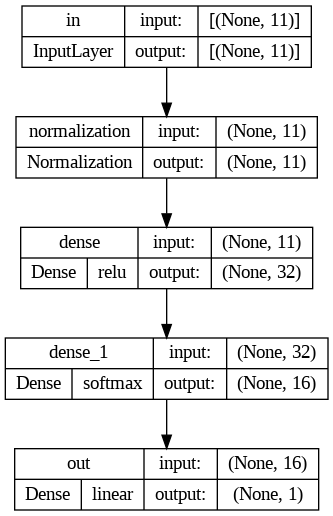

In [ ]:
# Визуализация архитектуры
keras.utils.plot_model(model32_16, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [ ]:
%%time
#Обучение нейросети
history = model32_16.fit(
  X_train_2par, 
  y_train_2par_my, 
  epochs=30, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/30
16/16 [==============================] - 6s 16ms/step - loss: 72.4297 - val_loss: 71.1333
Epoch 2/30
16/16 [==============================] - 0s 5ms/step - loss: 70.0667 - val_loss: 68.2497
Epoch 3/30
16/16 [==============================] - 0s 6ms/step - loss: 67.0323 - val_loss: 65.1083
Epoch 4/30
16/16 [==============================] - 0s 5ms/step - loss: 63.8630 - val_loss: 61.9192
Epoch 5/30
16/16 [==============================] - 0s 5ms/step - loss: 60.6687 - val_loss: 58.7212
Epoch 6/30
16/16 [==============================] - 0s 5ms/step - loss: 57.4697 - val_loss: 55.5215
Epoch 7/30
16/16 [==============================] - 0s 5ms/step - loss: 54.2699 - val_loss: 52.3216
Epoch 8/30
16/16 [==============================] - 0s 5ms/step - loss: 51.0700 - val_loss: 49.1216
Epoch 9/30
16/16 [==============================] - 0s 6ms/step - loss: 47.8700 - val_loss: 45.9216
Epoch 10/30
16/16 [==============================] - 0s 5ms/step - loss: 44.6700 - val_loss: 42.721

In [ ]:
#Функция для построения графика потерь модели на тренировочной и тестовой выборках
def model_loss_plot(model_history):
    plt.figure(figsize=(10, 5))
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

#Функция для построения графика оригинального и предсказанного значения у
def actual_and_predicted_plot(original_y, predicted_y):    
    plt.figure(figsize=(10,5))
    plt.title('Тестовые и прогнозные значения', size=12)
    plt.plot(original_y, color='blue', label = 'Тестовые значения')
    plt.plot(predicted_y, color='red', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()


In [ ]:
y_pred_test = model32_16.predict(np.array((X_test_2par)))
y_pred_train = model32_16.predict(np.array((X_train_2par)))

22/22 [==============================] - 0s 2ms/step


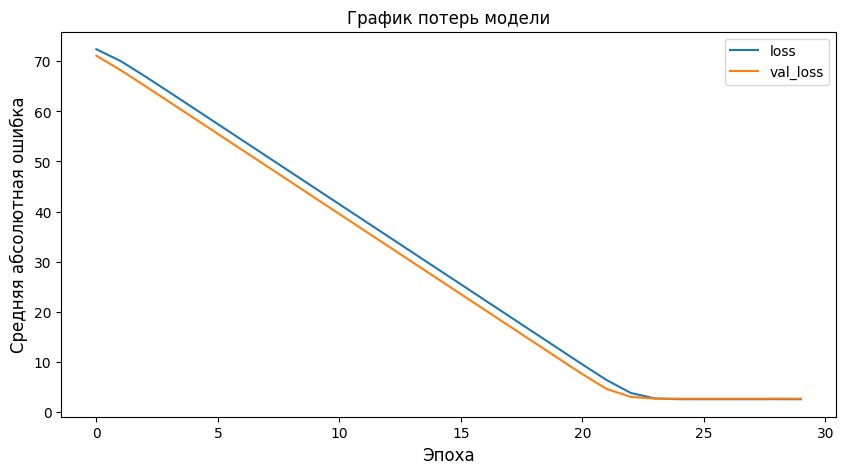

In [ ]:
model_loss_plot(history)

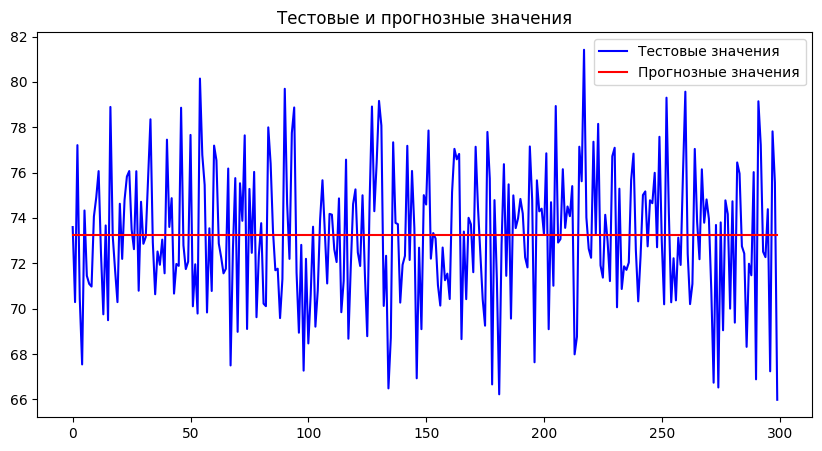

In [ ]:
actual_and_predicted_plot(y_test_2par_my.values, y_pred_test)

In [ ]:
app_metric_quality(df_pr_ns,'Model32-16_2par', y_pred_train, y_pred_test, y_train_2par_my, y_test_2par_my)
df_pr_ns

Модель     MSE  MSE_test   RMSE  RMSE_test    MAE  MAE_test  \
0  Model32-16_2par  10.088     8.765  3.176      2.961  2.539     2.391   

    MAXE  MAXE_test     R2  R2_test  
0  9.432      8.167 -0.001     -0.0

In [ ]:
print ((y_test_2par_my).mean(),(y_pred_test).mean(),y_pred_test[50])

73.21511811043204 73.2497 [73.2497]


Наша нейросеть предсказывает средние значения.

In [ ]:
#  Собираем нейросеть
def model_pr():
    model = Sequential()
    model.add(Dense(24, input_dim=12, activation='tanh', bias_initializer='he_normal', kernel_initializer='he_normal'))
    model.add(Dense(12, input_dim=24, activation='tanh', bias_initializer='he_normal', kernel_initializer='he_normal'))    
    model.add(Dense(1, input_dim=12, activation='linear', bias_initializer='he_normal', kernel_initializer='he_normal'))
    
    sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

In [ ]:
# тренируем сеть
model = model_pr()
# model.fit(x, y, nb_epoch=100, verbose = 0)
model.fit(X_train_my,y_train_my, epochs=100, verbose = 0)

10/10 [==============================] - 0s 2ms/step


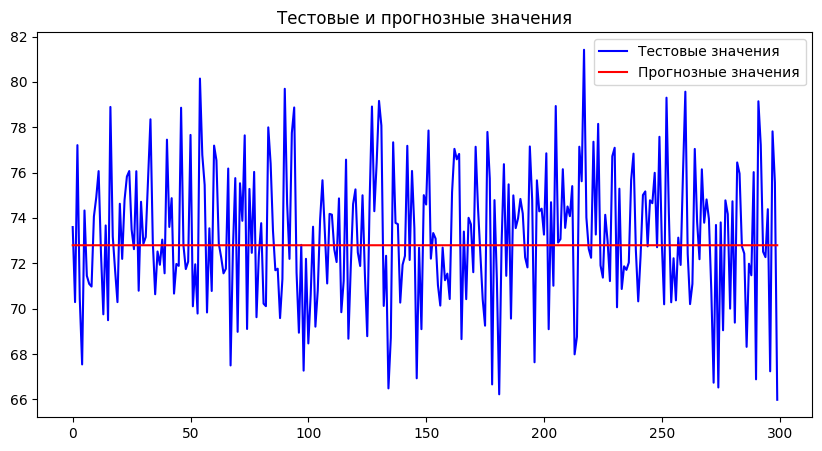

In [ ]:
pred_my=model.predict(X_test_my)
actual_and_predicted_plot(y_test_my.values, pred_my)

In [ ]:
X_train_pr_norm = normalizer.adapt(np.array(X_train_2par))

In [ ]:
model_pr = Sequential(X_train_pr_norm)

model_pr.add(Dense(64))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(32))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(16))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(1))
model_pr.add(Activation('selu'))

In [ ]:
early_pr = EarlyStopping(monitor='val_loss', min_delta=0, patience=22, verbose=1, mode='auto')

In [ ]:
model_pr.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01),
    loss='mean_absolute_error'
    )

In [ ]:
%%time
history_pr = model_pr.fit(
    X_train_2par,
    y_train_2par_my,
    batch_size = 32,
    epochs=100,
    verbose=1,
    validation_split = 0.2,
    callbacks=[early_pr])

Epoch 1/100
18/18 [==============================] - 3s 24ms/step - loss: 72.7886 - val_loss: 37.2292
Epoch 2/100
18/18 [==============================] - 0s 11ms/step - loss: 72.1124 - val_loss: 46.4086
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 71.3671 - val_loss: 50.8394
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 70.4690 - val_loss: 52.8996
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 69.3157 - val_loss: 55.5319
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 67.7996 - val_loss: 56.1822
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 65.7307 - val_loss: 60.5121
Epoch 8/100
18/18 [==============================] - 0s 8ms/step - loss: 62.8921 - val_loss: 63.8292
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 58.9992 - val_loss: 66.9486
Epoch 10/100
18/18 [==============================] - 0s 7ms/step - loss: 53.4992 - val_l

10/10 [==============================] - 0s 2ms/step


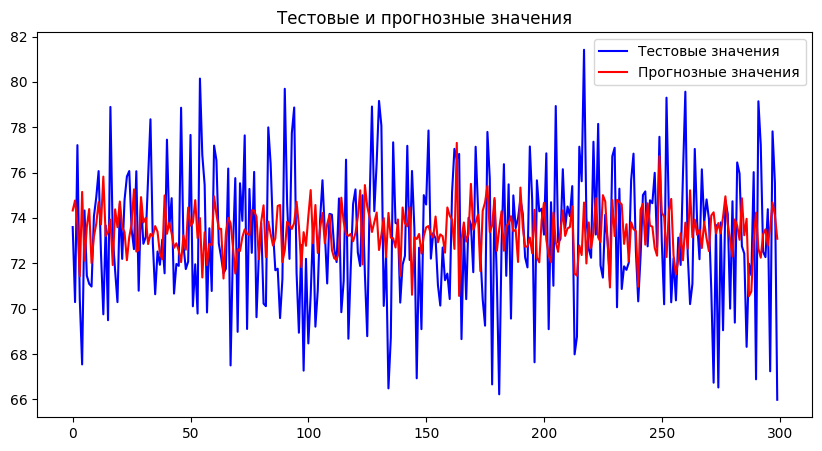

In [ ]:
pred_pr = model_pr.predict(np.array((X_test_2par)))
original_pr = y_test_2par_my.values
predicted_pr = pred_pr

actual_and_predicted_plot(original_pr, predicted_pr)

In [ ]:
pred_pr_train = model_pr.predict(np.array((X_test_2par)))
original_pr_train = y_train_2par_my.values


10/10 [==============================] - 0s 3ms/step


In [ ]:
app_metric_quality(df_pr_ns,'Model32-16_2par', y_pred_train, predicted_pr, original_pr_train, original_pr)
df_pr_ns

Модель         MSE    MSE_test     RMSE  RMSE_test  \
0   Model32-16_2par_min_max      10.093       8.764    3.177      2.960   
1           Model32-16_2par      10.093       8.764    3.177      2.960   
2           Model32-16_2par      10.093      13.342    3.177      3.653   
3           Model32-16_2par      10.093      10.154    3.177      3.187   
4           Model32-16_2par      10.093      11.953    3.177      3.457   
5           Model32-16_2par      10.093      12.589    3.177      3.548   
6           Model32-16_2par      10.093      10.973    3.177      3.313   
7           Model32-16_2par      10.093      13.805    3.177      3.716   
8           Model32-16_2par  854070.712  854341.545  924.159    924.306   
9           Model32-16_2par      10.095       8.764    3.177      2.960   
10          Model32-16_2par      10.095      11.278    3.177      3.358   
11          Model32-16_2par      10.095      10.181    3.177      3.191   
12          Model32-16_2par      10.095      11.873    3.177      3.446   
13          Model32-16_2par      10.095      13.419    3.177      3.663   
14          Model32-16_2par      10.095      10.008    3.177      3.163   

        MAE  MAE_test     MAXE  MAXE_test         R2    R2_test  
0     2.539     2.390    9.454      8.189     -0.002     -0.000  
1     2.539     2.390    9.454      8.189     -0.002     -0.000  
2     2.539     2.835    9.454     12.036     -0.002     -0.522  
3     2.539     2.555    9.454      8.039     -0.002     -0.159  
4     2.539     2.748    9.454      9.898     -0.002     -0.364  
5     2.539     2.831    9.454      9.281     -0.002     -0.436  
6     2.539     2.646    9.454      9.082     -0.002     -0.252  
7     2.539     2.999    9.454     11.097     -0.002     -0.575  
8   924.154   924.301  933.462    931.536 -84770.230 -97485.550  
9     2.540     2.390    9.460      8.195     -0.002     -0.000  
10    2.540     2.685    9.460     10.118     -0.002     -0.287  
11    2.540     2.553    9.460      8.326     -0.002     -0.162  
12    2.540     2.793    9.460      9.178     -0.002     -0.355  
13    2.540     2.971    9.460     10.627     -0.002     -0.531  
14    2.540     2.499    9.460      7.739     -0.002     -0.142